####                                   AVANCE 1

***
##### BIOGENESYS es una empresa farmacéutica que busca la expansión de sus laboratorios en latinoamérica, específicamente en Colombia, Argentina, Chile, México, Perú y Brasil.
***
###### Con el dataset brindado por el equipo de Data Engineering, realizaremos un análisis de la demanda de vacunas, la logística de distribución y la infraestructura sanitaria existente para orientar a la empresa sobre las ubicaciones estratégicas para nuevos laboratorios y centros de vacunación

In [ ]:
import pandas as pd
import numpy as np

#importamos las librerias numpy y pandas para comenzar con el analisis y manipulación del Dataset.

In [2]:
archivo = '/Users/nicolasraimundo/data_latinoamerica.csv'

data_latinoamerica = pd.read_csv(archivo, parse_dates =['date'])
#El archivo es un csv y utilizamos la función de la librería Pandas para leerlo.
#con parse_dates aseguramos que la tabla 'date' sea de tipo fecha


In [3]:
data_latinoamerica.head()
#se muestran las primeras 5 filas del dataset

location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
data_latinoamerica.info()

#obtenemos la informacion de la cantidad de columnas y el tipo de cada una

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


##### Hay que realizar un filtro para centrarnos solamente en la informacion que es relevante para nuestro análisis

***


In [ ]:
data_latinoamerica.isnull().sum()
#Se cuentan la cantidad de valores nulos y encontramos que la columna 'location_key' no tiene valores faltantes, por lo tanto se usa para realizar el filtro correspondiente.
#Hay muchas columnas con un gran porcentaje de valores nulos
#Ej:acumulado de dosis, poblacion, gdp,  prevalencia de dbt, nuevos recuperados,etc.

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5839054
new_deceased                              5893738
cumulative_confirmed                      5838685
cumulative_deceased                       5893376
cumulative_vaccine_doses_administered    11948128
population                                 532167
population_male                           1123794
population_female                         1123794
population_rural                         12196237
population_urban                         12196237
population_density                       12196237
human_development_index                   6705106
population_age_00_09                      1466680
population_age_10_19                      1466680
population_age_20_29                      1466680
population_age_30_39                      1466680


In [7]:
identificador = ['AR','BR','MX','CO','CL','PE']
#Utilizamos los identificadores de la columna 'location_key'
df_filtrado = data_latinoamerica[data_latinoamerica['location_key'].isin(identificador)]
#Mediante la función .isin se genera una evaluación mediante valores booleanos para filtrar el dataset.
#De esta forma, los países que se encuentran dentro del array previamente creado son los que se utilizan.

df_filtrado['location_key'].unique()
#corroboramos con .unique() que se encuentren cada uno de los países a analizar

array(['AR', 'BR', 'CL', 'CO', 'MX', 'PE'], dtype=object)

In [ ]:
df_filtrado.info()
#volvemos a consultar y de 12M de entradas, lo reducimos a 5946
#también mejoró el porcentaje de valores nulos respecto al total

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           5946 non-null   object        
 1   date                                   5946 non-null   datetime64[ns]
 2   country_code                           5946 non-null   object        
 3   country_name                           5946 non-null   object        
 4   new_confirmed                          5925 non-null   float64       
 5   new_deceased                           5925 non-null   float64       
 6   cumulative_confirmed                   5925 non-null   float64       
 7   cumulative_deceased                    5925 non-null   float64       
 8   cumulative_vaccine_doses_administered  3173 non-null   float64       
 9   population                             5946 non-null   float64  

In [ ]:
df_filtrado_fecha = df_filtrado[df_filtrado['date'] > '2021-01-01']
#Aplicamos un nuevo filtro, esta vez es para fechas mayores al 2021-01-01

df_filtrado_fecha.info()
#De esta forma, de 5946 entradas pasamos a obtener 3744.
#Solo 2 de las 50 columnas tienen mas de la mitad de los valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3723 non-null   float64       
 5   new_deceased                           3723 non-null   float64       
 6   cumulative_confirmed                   3723 non-null   float64       
 7   cumulative_deceased                    3723 non-null   float64       
 8   cumulative_vaccine_doses_administered  3160 non-null   float64       
 9   population                             3744 non-null   float64

In [10]:
paises = ['Argentina','Brazil','Mexico','Peru','Chile','Colombia']
#generamos una lista con los nombres de los paises que nos interesan para el análisis

##### Una vez filtrado, continuaremos con la transformación del Dataframe para trabajar sin valores nulos.

In [ ]:
#iteramos la lista países para completar en cada país en particular lo siguiente
for pais in paises:
    #a las columnas con un porcentaje bajo de faltantes se las rellena con el promedio de esa columna para ese país
    df_filtrado_fecha['new_confirmed'] = df_filtrado_fecha['new_confirmed'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['new_confirmed'].mean())
    df_filtrado_fecha['new_deceased'] = df_filtrado_fecha['new_deceased'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['new_deceased'].mean())
    df_filtrado_fecha['cumulative_confirmed'] = df_filtrado_fecha['cumulative_confirmed'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['cumulative_confirmed'].mean())
    df_filtrado_fecha['cumulative_deceased'] = df_filtrado_fecha['cumulative_deceased'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['cumulative_deceased'].mean())
    df_filtrado_fecha['average_temperature_celsius'] = df_filtrado_fecha['average_temperature_celsius'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['average_temperature_celsius'].mean())
    df_filtrado_fecha['minimum_temperature_celsius'] = df_filtrado_fecha['minimum_temperature_celsius'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['minimum_temperature_celsius'].mean())
    df_filtrado_fecha['maximum_temperature_celsius'] = df_filtrado_fecha['maximum_temperature_celsius'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['maximum_temperature_celsius'].mean())
    df_filtrado_fecha['rainfall_mm'] = df_filtrado_fecha['rainfall_mm'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['rainfall_mm'].mean())
    df_filtrado_fecha['relative_humidity'] = df_filtrado_fecha['relative_humidity'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['relative_humidity'].mean())

    #aquellas columnas que tienen un porcentaje moderado/alto de valores faltantes, se las rellena con el valor anterior del mismo país
    df_filtrado_fecha['new_recovered'] = df_filtrado_fecha['new_confirmed'].fillna(method = 'ffill')
    df_filtrado_fecha['cumulative_recovered'] = df_filtrado_fecha['new_confirmed'].fillna(method = 'ffill')
    df_filtrado_fecha['cumulative_vaccine_doses_administered'] = df_filtrado_fecha['new_confirmed'].fillna(method = 'ffill')

/var/folders/z_/ncwghck114sfrjgmq959t5140000gn/T/ipykernel_7252/387129087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_fecha['new_confirmed'] = df_filtrado_fecha['new_confirmed'].fillna(df_filtrado_fecha[df_filtrado_fecha['country_name'] ==pais]['new_confirmed'].mean())
/var/folders/z_/ncwghck114sfrjgmq959t5140000gn/T/ipykernel_7252/387129087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_fecha['new_deceased'] = df_filtrado_fecha['new_deceased'].fillna(df_filtrado_fecha[d

In [12]:
df_filtrado_fecha.isnull().sum()
#volvemos a ver la cantidad de nulos por columna y encontramos que no hay ninguno.

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

##### Como variables clave encontramos:
- Date
- Country_name / Location_key
- New_confirmed / new_deceased
- Cumulative_confirmed / Cumulative_deceased / Cumulative_vaccine_doses_administrated / Cumulative_recovered
- Mortality_rate
- Smoking_prevalence / Diabetes_prevalence

In [ ]:
#Una vez hecha la limpieza y transformación de datos, se guarda en un archivo
#.csv, para no tener que cargar nuevamente el archivo original
df_filtrado_fecha.to_csv('DatosFinalesFiltrados.csv')

-----------------------------------------------------------------------------------------------------------

### Avance 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importamos las librerias a utilizar

In [2]:
data_latam = pd.read_csv('/Users/nicolasraimundo/Desktop/Henry_python/DatosFinalesFiltrados.csv')
data_latam.drop('Unnamed: 0',axis=1,inplace=True)#Borro la columna que se me habia creado al modificar el índice
data_latam.head()
#cargamos el csv que guardamos en el avance 1

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                 7767.0  44938712.0  ...   
1                                 4934.0  44938712.0  ...   
2                                13953.0  44938712.0  ...   
3                                14085.0  44938712.0  ...   
4                                14496.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8         7767.0   
1                      26.6                        15.8         4934.0   
2                      26.6                        15.8        13953.0   
3                      26.6                        15.8        14085.0   
4                      26.6                        15.8        14496.0   

   cumulative_recovered  
0                7767.0  
1                4934.0  
2               13953.0  
3               14085.0  
4               14496.0  

[5 rows x 50 columns]

In [3]:
data_latam.info() #Rápida descripción de las columnas
#Vemos que la columna date es de tipo objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [4]:
data_latam.columns #nombre de cada una de las columnas

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [5]:
#Realizacion de una rápida estadística descriptiva de cada columna
for i in data_latam.columns:
    print(i),#Nombre de la columna
    print(data_latam[i].describe())#Estadistica descriptiva
    print('---------')#Linea separadora de columnas

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
---------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype: float64
---------
cumulative_confirmed
count

In [6]:
#Creación de una funcion para ver la mediana, varianza y rango
def estadistica(df):
    # Definimos las columnas de interes
    columnas_interes = ['new_confirmed', 'new_deceased', 'new_recovered']

    # Creamos un diccionario para almacenar los resultados
    estadisticas = {}

    # Agrupamos por país
    for pais, grupo in data_latam.groupby('country_name'):
        pais_estadisticas = {}

        # Calculamos las estadísticas para cada columna por país
        for columna in columnas_interes:
            mediana = grupo[columna].median()
            varianza = grupo[columna].var()
            rango = grupo[columna].max() - grupo[columna].min()

            pais_estadisticas[columna] = {
                'mediana': mediana,
                'varianza': varianza,
                'rango': rango
            }

        # Almacenamos las estadísticas por país
        estadisticas[pais] = pais_estadisticas

    return estadisticas

resultado = estadistica(data_latam)
resultado

{'Argentina': {'new_confirmed': {'mediana': 5223.5,
   'varianza': 553382986.1073345,
   'rango': 174174.0},
  'new_deceased': {'mediana': 64.0,
   'varianza': 27559.075324910686,
   'rango': 656.0},
  'new_recovered': {'mediana': 5223.5,
   'varianza': 553382986.1073345,
   'rango': 174174.0}},
 'Brazil': {'new_confirmed': {'mediana': 32382.0,
   'varianza': 1566620048.0472069,
   'rango': 298981.0},
  'new_deceased': {'mediana': 389.0,
   'varianza': 756022.0468503608,
   'rango': 4242.0},
  'new_recovered': {'mediana': 32382.0,
   'varianza': 1566620048.0472069,
   'rango': 298981.0}},
 'Chile': {'new_confirmed': {'mediana': 4249.5,
   'varianza': 46432743.80914253,
   'rango': 38173.0},
  'new_deceased': {'mediana': 33.0,
   'varianza': 210605.83774156703,
   'rango': 11447.0},
  'new_recovered': {'mediana': 4249.5,
   'varianza': 46432743.80914253,
   'rango': 38173.0}},
 'Colombia': {'new_confirmed': {'mediana': 2585.0,
   'varianza': 85241509.87588738,
   'rango': 40415.0},
  'n

* La mediana es el valor que se encuentra en el medio del conjunto de datos, es mas fiable que el promedio ya que no se modifica por valores atípicos y extremos. La varianza y el rango en cada una de las columnas a evaluar da un valor muy alto, lo cual indica que hay una alta dispersión de los datos.

Utilizaremos la columna Date como índice para analizar datos a lo largo del tiempo

In [3]:
#Convertimos de objeto a datetime
data_latam['date']= pd.to_datetime(data_latam['date'])
#Seteamos date como indice
data_latam.set_index('date',inplace=True)#con inplace=True permitimos el cambio en el df
#Volvemos a ver las primeras filas para comprobar el resultado

data_latam.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 7767.0  44938712.0   
2021-01-03                                 4934.0  44938712.0   
2021-01-04                                13953.0  44938712.0   
2021-01-05                                14085.0  44938712.0   
2021-01-06                                14496.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8         7767.0                7767.0  
2021-01-03                        15.8         4934.0                4934.0  
2021-01-04                        15.8        13953.0               13953.0  
2021-01-05                        15.8        14085.0               14085.0  
2021-01-06                        15.8        14496.0               14496.0  

[5 rows x 49 columns]

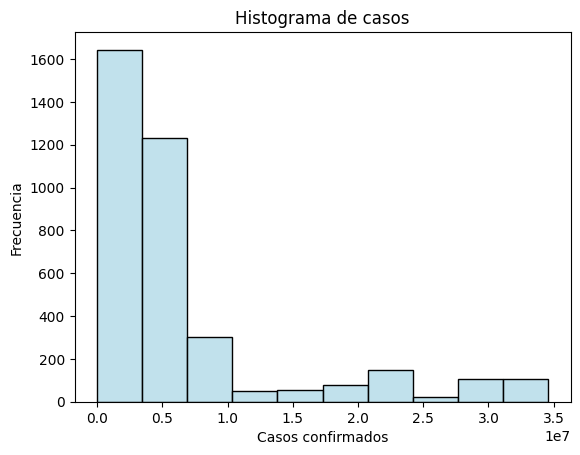

In [17]:
plt.figure()
sns.histplot(
    data=data_latam,
    x='cumulative_confirmed',
    bins=10,
    color='lightblue'
)
plt.title('Histograma de casos')
plt.xlabel('Casos confirmados')
plt.ylabel('Frecuencia')
plt.show()

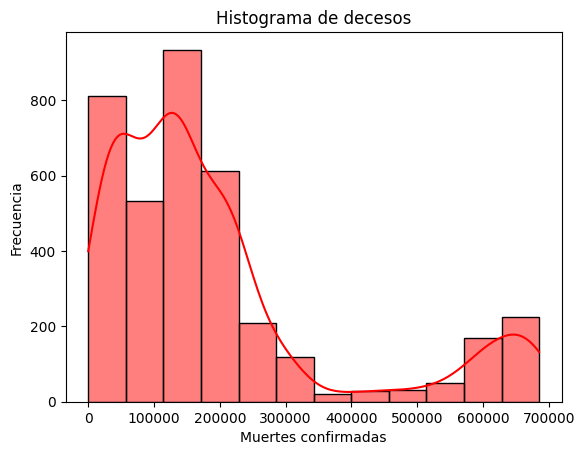

In [18]:
plt.figure()
sns.histplot(
    data=data_latam,
    x='cumulative_deceased',
    bins=12,
    color='red',
    kde=True,
    alpha=0.5
)
plt.title('Histograma de decesos')
plt.xlabel('Muertes confirmadas')
plt.ylabel('Frecuencia')

plt.show()

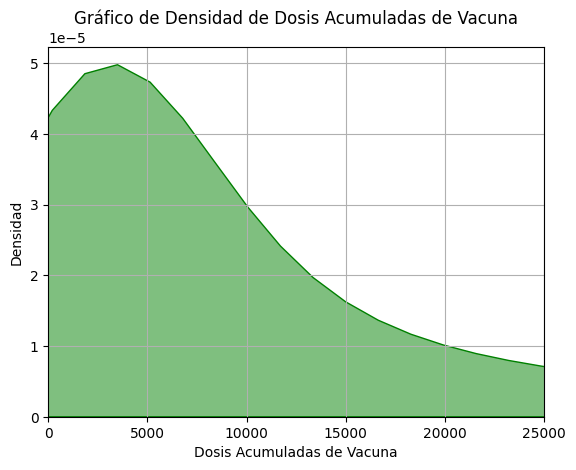

In [22]:
plt.figure()
sns.kdeplot(
    x=data_latam['cumulative_vaccine_doses_administered'],
    fill=True,
    color='green',
    alpha= 0.5
    )
plt.title('Gráfico de Densidad de Dosis Acumuladas de Vacuna')
plt.xlabel('Dosis Acumuladas de Vacuna')
plt.ylabel('Densidad')
plt.xlim(0,25000)
plt.grid(True)
plt.show()

Se realiza un analisis multivariable mediante un heatmap

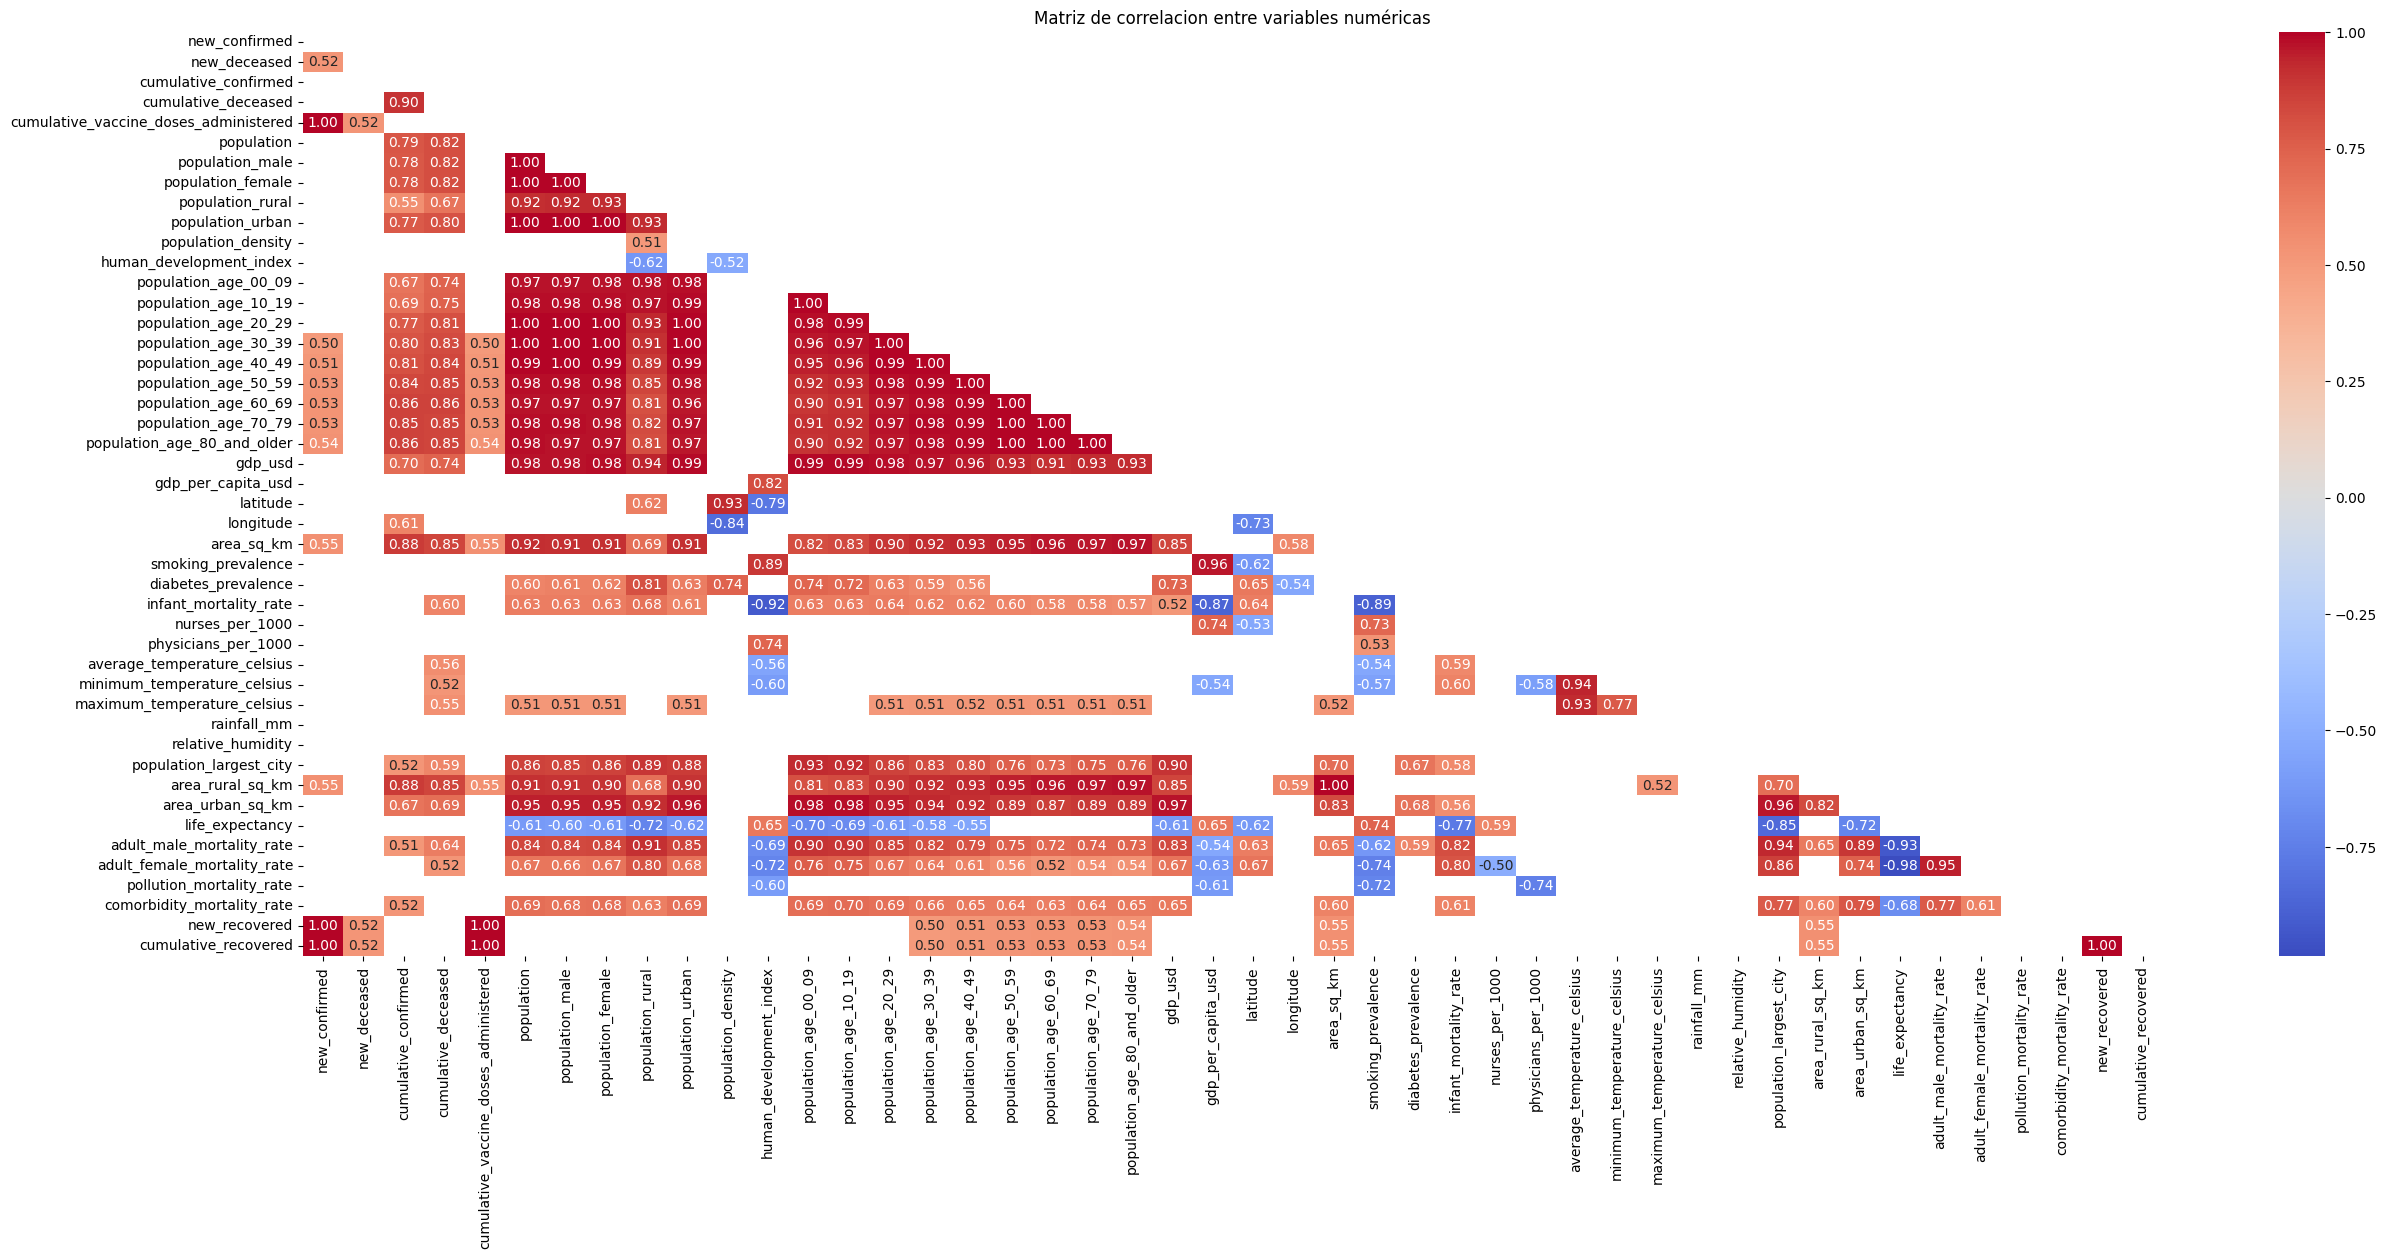

In [9]:
#Creamos una matriz de correlacion sobre las columnas numéricas
columnas_numericas = data_latam.select_dtypes(include=['float64','int64']).columns
correlacion = data_latam[columnas_numericas].corr()

#Creamos una mascara para no visualizar valores repetidos
mascara = np.triu(np.ones_like(correlacion, dtype= bool))
#Mostramos solamente los valores con una correlación fuerte
correlacion = correlacion[abs(correlacion)>abs(0.5)]

#Creamos la figura y se muestra

plt.figure(figsize=(30,12))
heatmap = sns.heatmap(correlacion,mask=mascara,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Matriz de correlacion entre variables numéricas')
plt.show()

El heatmap nos muestra una correlacion positiva entre casos y muertes, pero tambien entre vacunacion y casos(lo cual no parecería muy lógico).
Además, no hay valores sobre vacunacion en adultos jovenes(18 a 30 años).
En las zonas de mayor urbanizacion hay mayores muertes; así también, a mayor edad, mayor cantidad de muertes.

Gráfico de barras para columnas con datos numéricos de interes

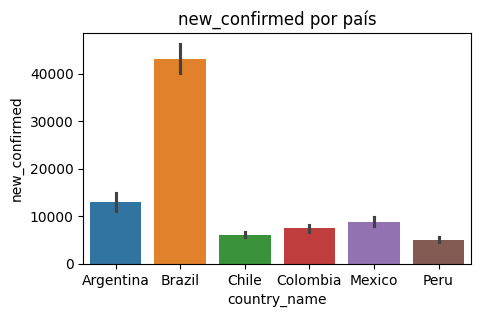

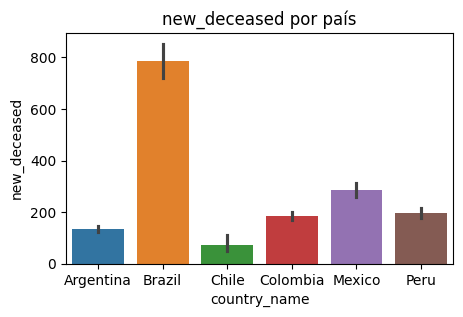

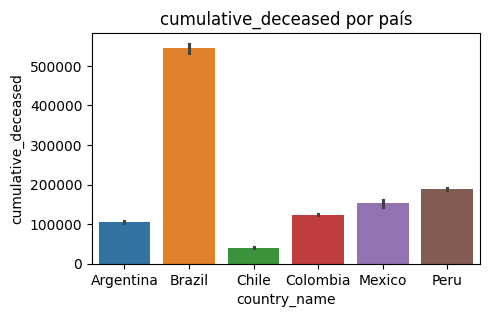

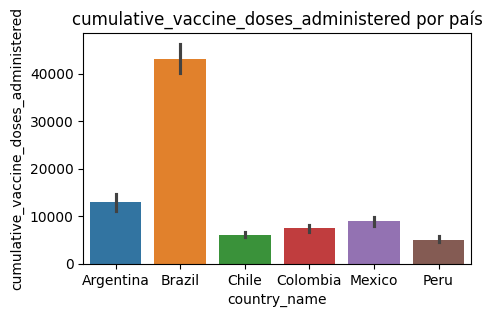

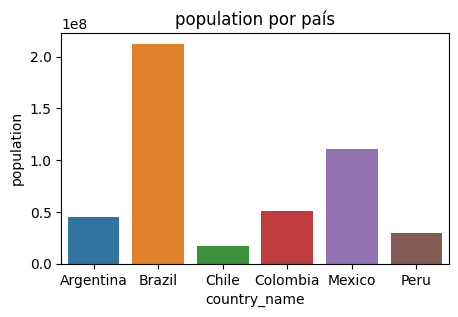

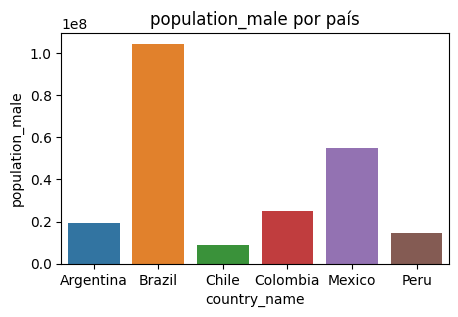

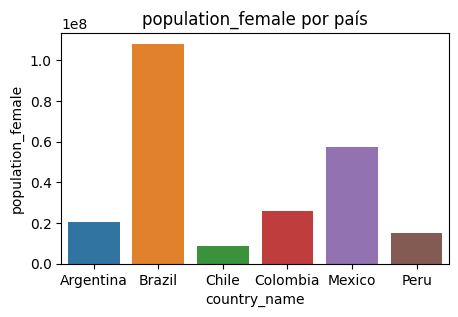

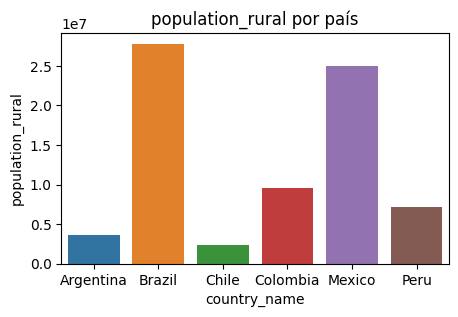

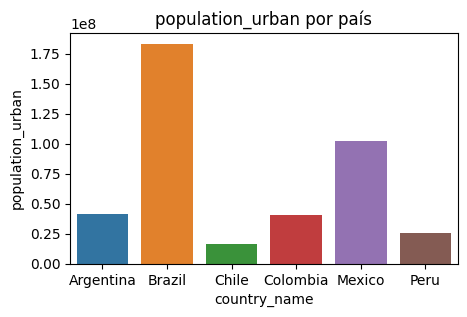

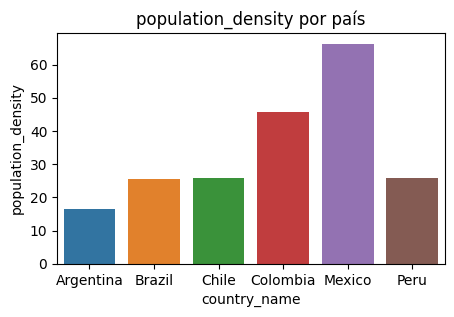

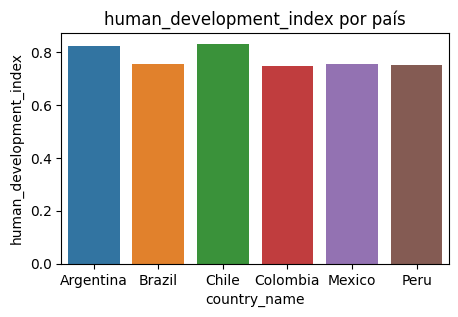

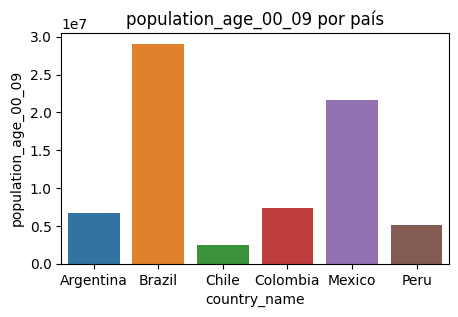

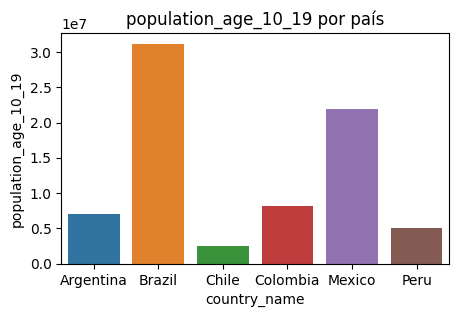

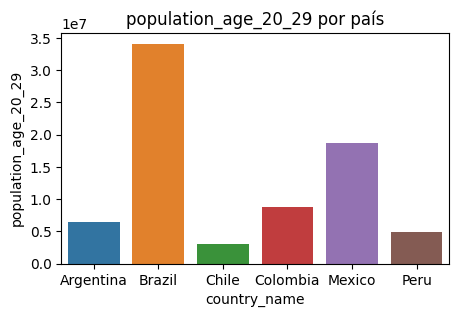

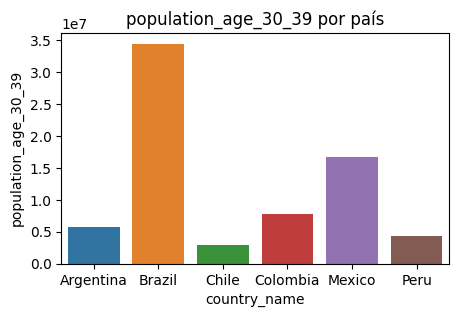

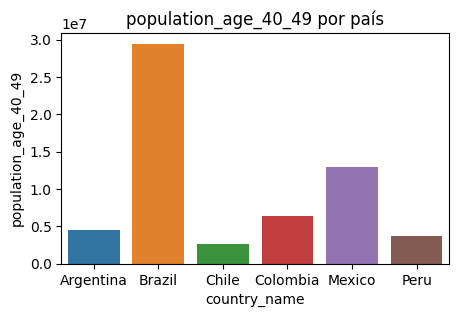

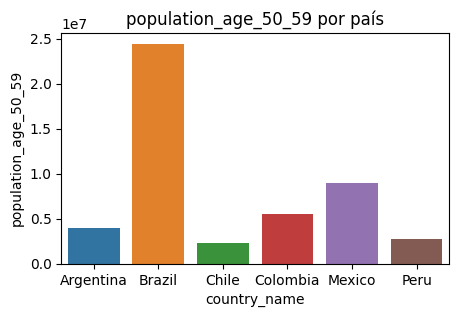

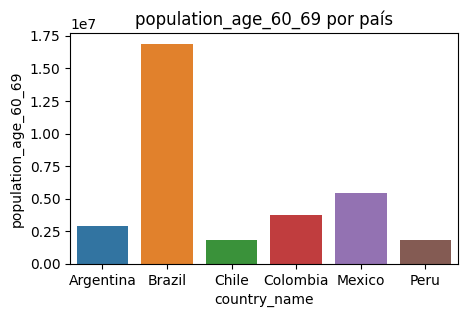

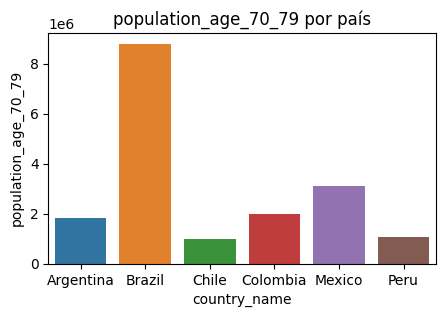

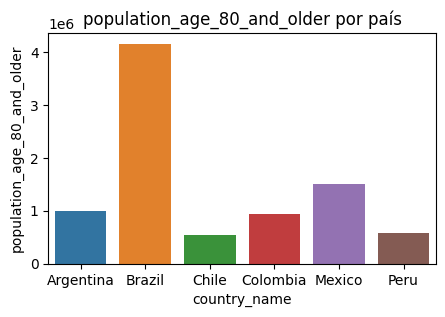

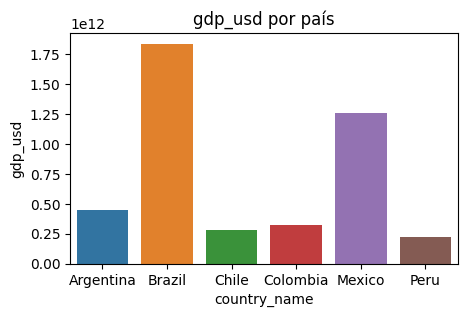

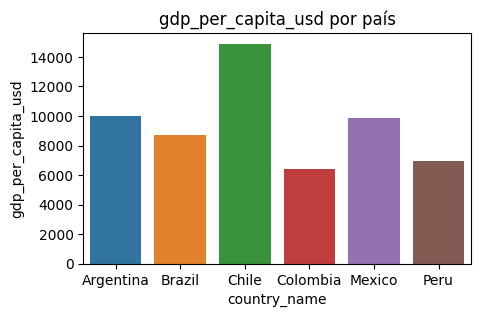

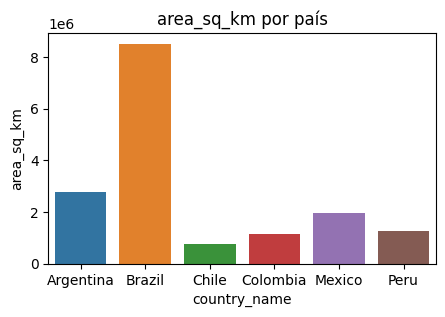

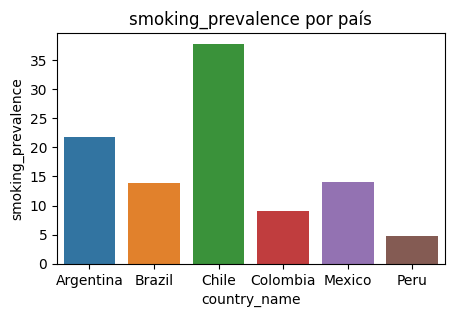

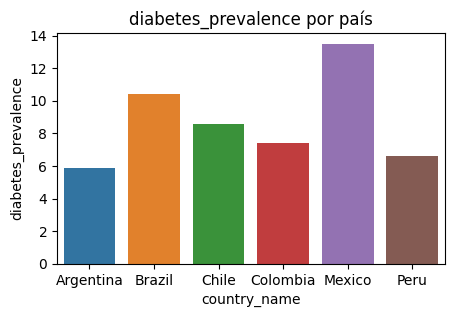

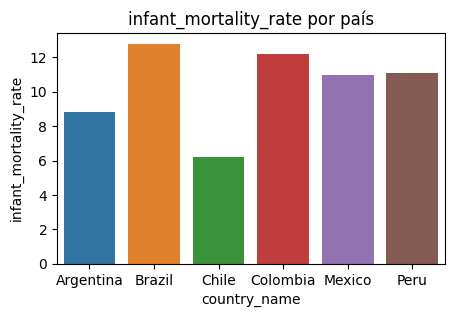

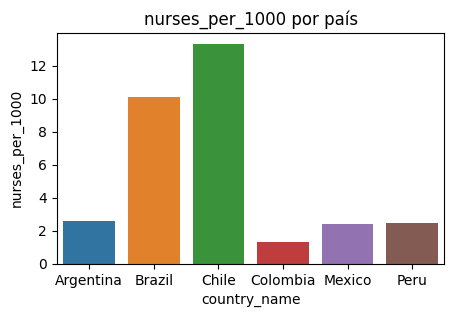

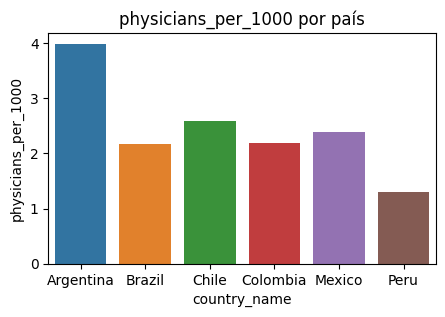

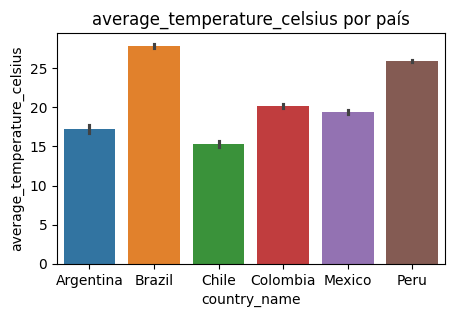

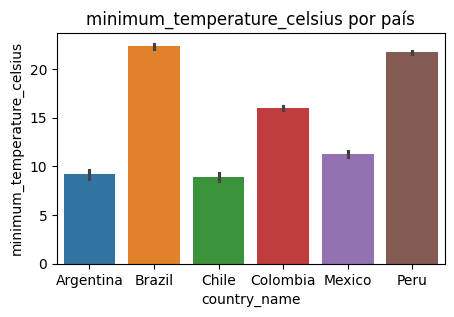

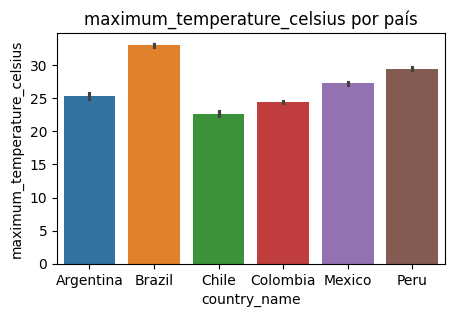

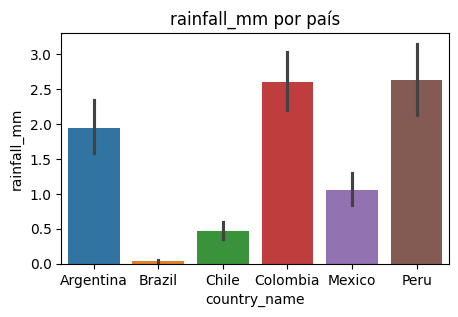

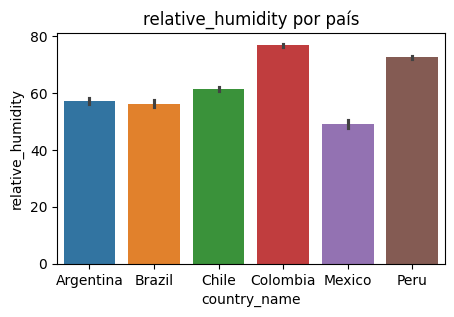

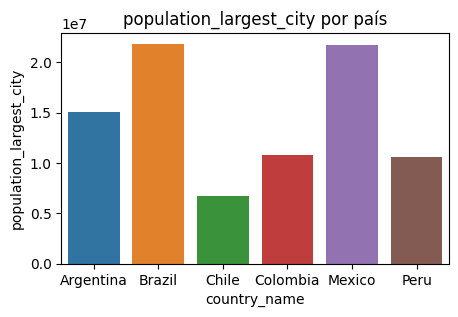

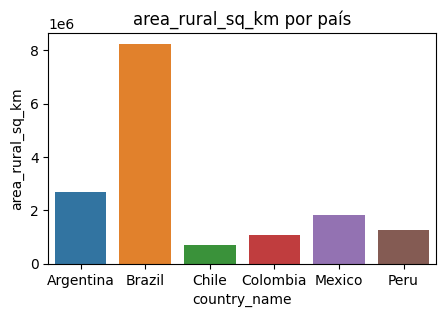

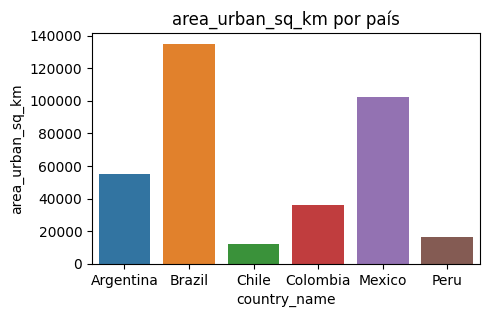

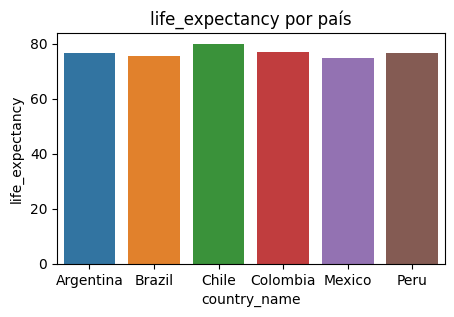

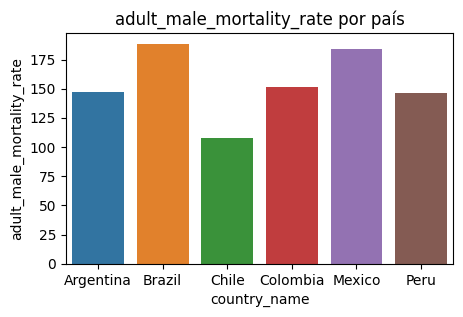

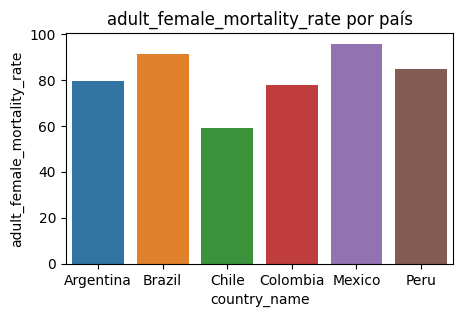

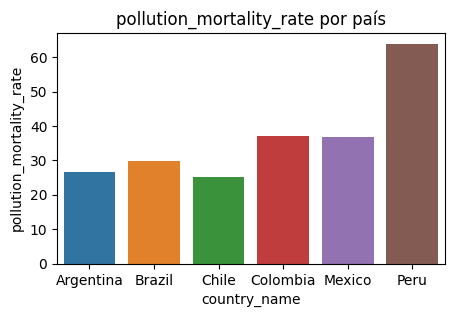

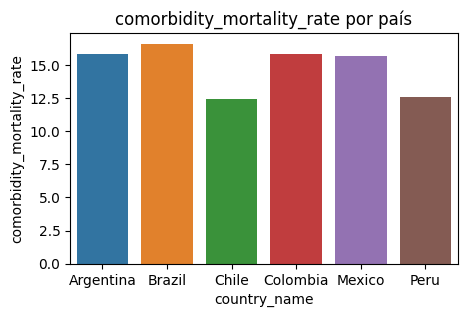

In [ ]:
data_latam = data_latam.reset_index()
#reseteamos indice y 'date' vuelve a ser columna

for i in data_latam.columns:#iteramos cada columna que no esté en la lista
    if i not in ['location_key','date','country_name','country_code','latitude','longitude',
                    'cumulative_confirmed','cumulative_recovered','cumulative_vaccine_doses_administrated',
                    'new_recovered']:
        fig,ax = plt.subplots(figsize=(5,3))#creamos un barplot para cada uno con nombre y cantidades
        sns.barplot(
            data=data_latam, 
            x='country_name',
            y= i,ax=ax,
            hue='country_name'
            )#con hue diferenciamos cada país con un color distinto
        plt.title(f'{i} por país')
        plt.show()

Diagrama de dispersión de la temperatura media contra los casos confirmados.

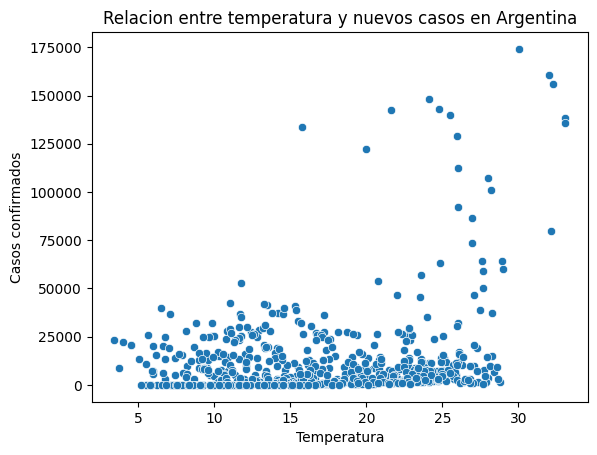

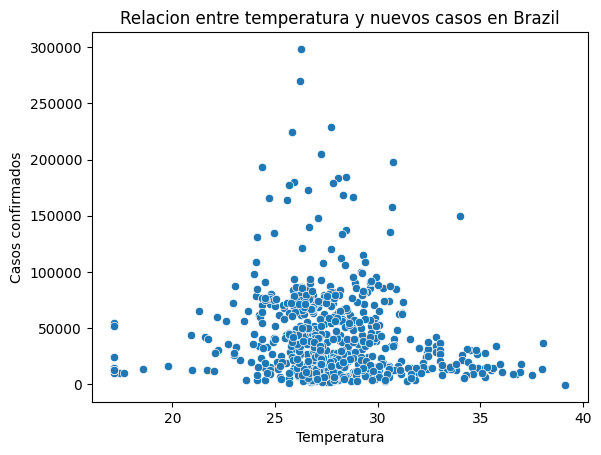

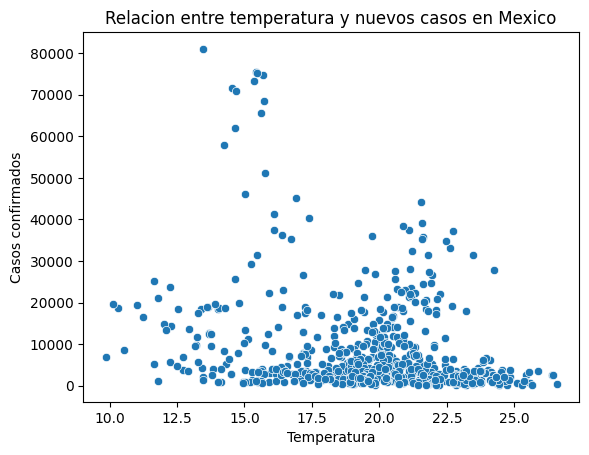

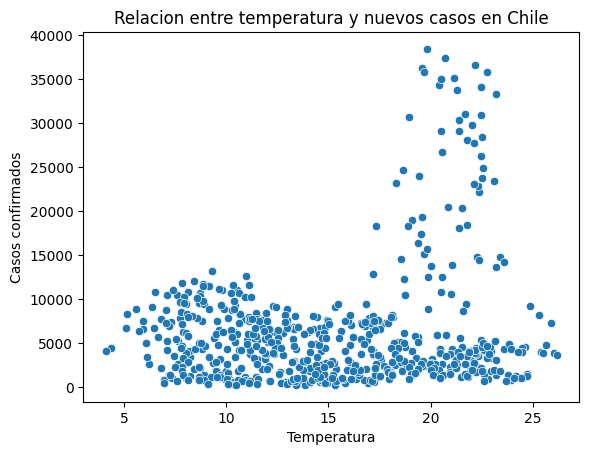

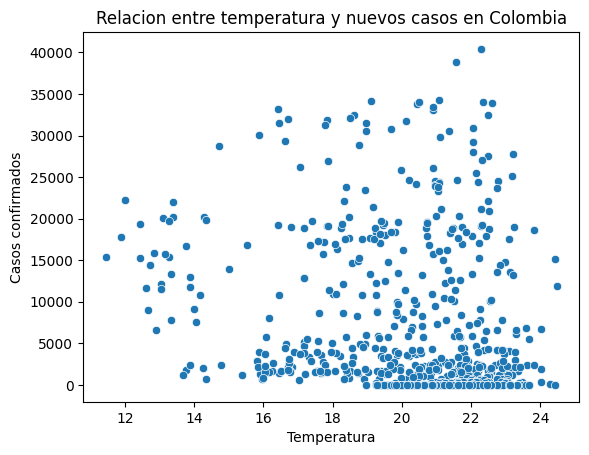

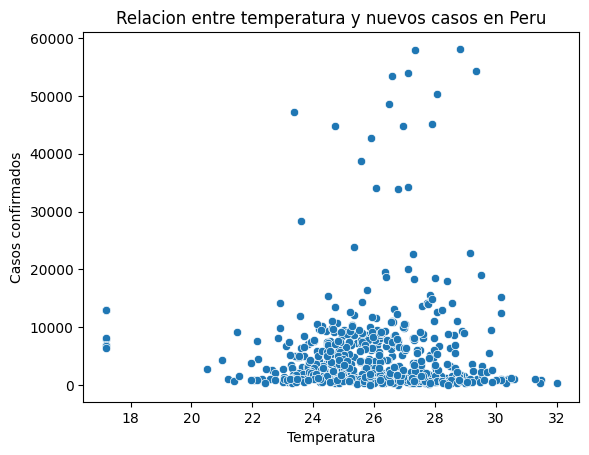

In [ ]:
paises = ['Argentina','Brazil','Mexico','Chile','Colombia','Peru']
for pais in paises:
        df_pais = data_latam[data_latam['country_name']== pais]
        fig,ax = plt.subplots()
        sns.scatterplot(
        data=df_pais,
        x='average_temperature_celsius',
        y='new_confirmed',
        )

        plt.title(f'Relacion entre temperatura y nuevos casos en {pais}')
        plt.xlabel('Temperatura')
        plt.ylabel('Casos confirmados')

        plt.show()

Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

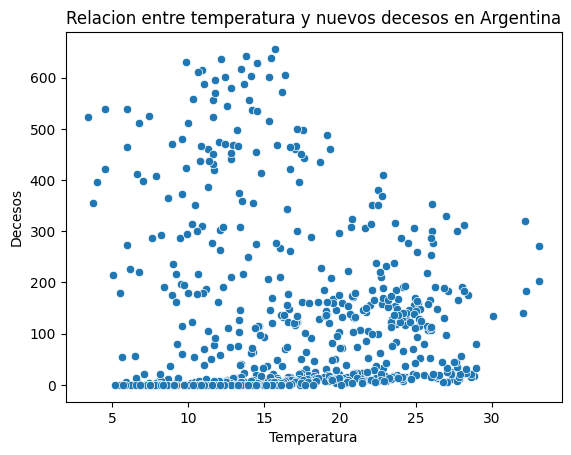

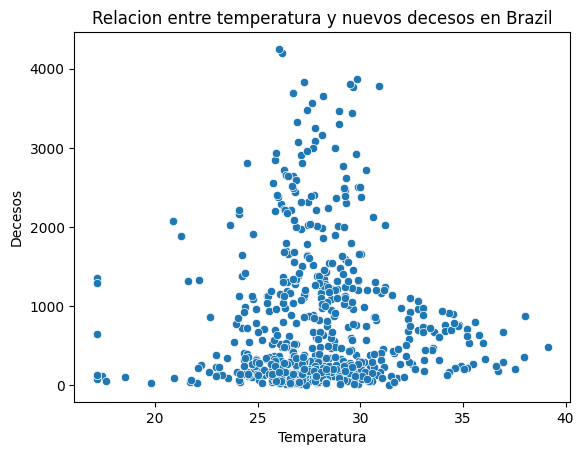

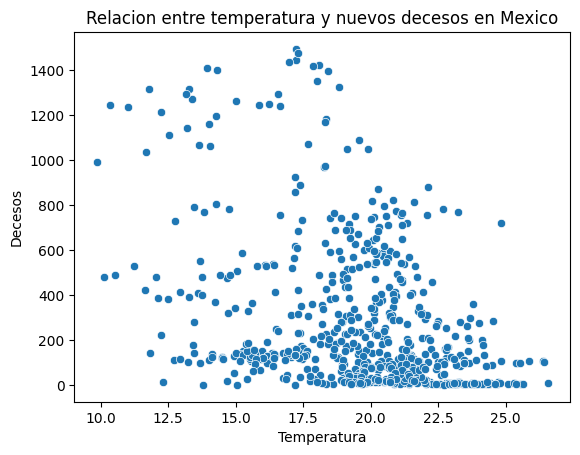

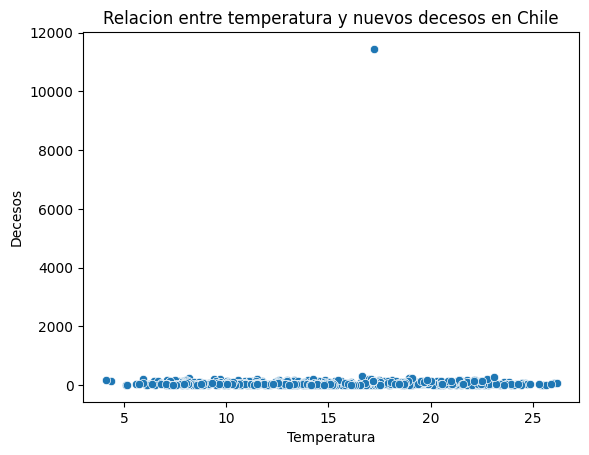

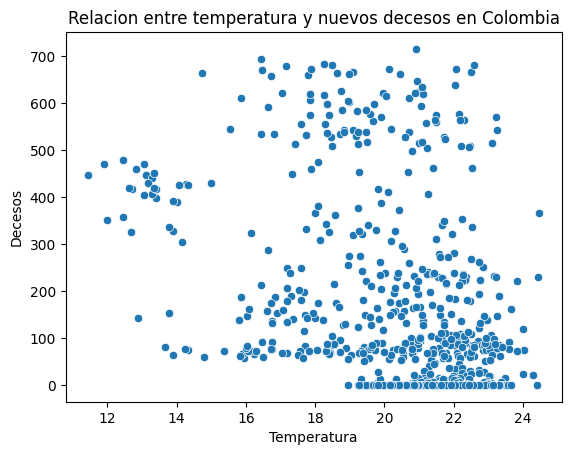

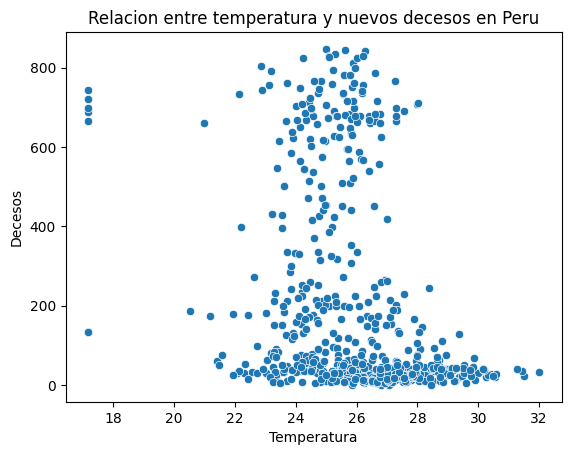

In [ ]:

for pais in paises:
        df_pais = data_latam[data_latam['country_name']== pais]
        fig,ax = plt.subplots()
        sns.scatterplot(
        data=df_pais,
        x='average_temperature_celsius',
        y='new_deceased',
        )

        plt.title(f'Relacion entre temperatura y nuevos decesos en {pais}')
        plt.xlabel('Temperatura')
        plt.ylabel('Decesos')

        plt.show()

Comportamiento de las dosis por país(valor medio)

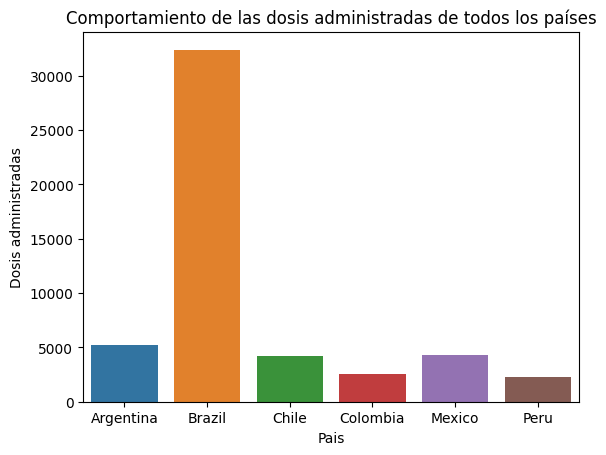

In [34]:
#Agrupacion de dosis por pais y luego obtenemos la mediana
dosis_administradas_pais = data_latam.groupby('country_name')['cumulative_vaccine_doses_administered'].median().reset_index()
#uso el metodo .reset_index() en cada una de las variables, ya que quiero que 'date' siga siendo indice en el df
# Selecciono solo las columnas necesarias del df data_latam: 'country_name' y 'cumulative_vaccine_doses_administered'
dosis_administradas_pais = dosis_administradas_pais[['country_name', 'cumulative_vaccine_doses_administered']]

   
fig,ax = plt.subplots()
sns.barplot(
            data = dosis_administradas_pais,
            x='country_name',
            y='cumulative_vaccine_doses_administered',
            hue='country_name'
     )
plt.xlabel('Pais')
plt.ylabel('Dosis administradas')
plt.title('Comportamiento de las dosis administradas de todos los países')
plt.show()

In [ ]:
#Creacion de una nueva columna llamada year_month

data_latam = data_latam.reset_index()
#resetamos el índice para poder utilizar a 'date' como columna
data_latam['year_month']= data_latam['date'].dt.to_period('M')

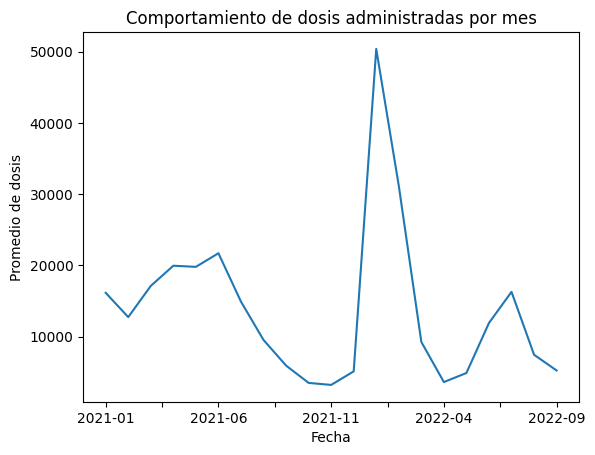

In [37]:
progresion_pais = data_latam.groupby('year_month')['cumulative_vaccine_doses_administered'].mean()

progresion_pais.plot(kind='line')
plt.title('Comportamiento de dosis administradas por mes')
plt.xlabel('Fecha')
plt.ylabel('Promedio de dosis')
plt.show()

### Evolucion de dosis administradas por pais (esta duplicado, ver si queda mejor en un grafico o todos x separado)

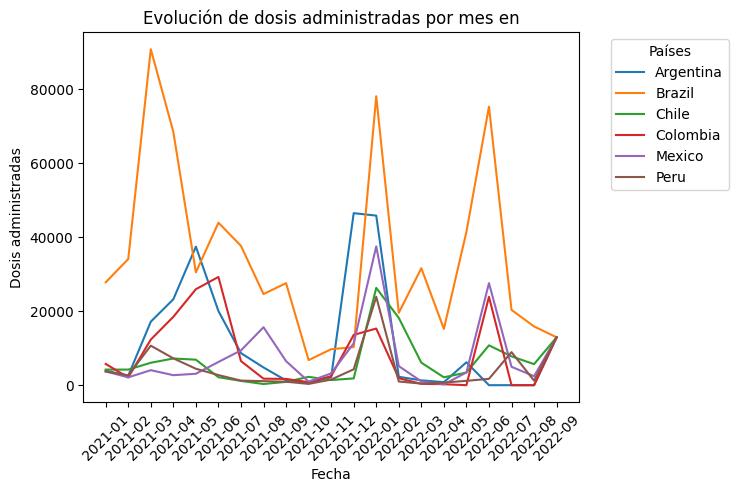

In [ ]:
# Conversión de 'year_month' a string para facilitar la visualización
#data_latam['year_month'] = data_latam['year_month'].astype(str)
dosis_mes_pais = data_latam.groupby(['country_name', 'year_month'])['cumulative_vaccine_doses_administered'].last().reset_index()

plt.figure()

for pais in dosis_mes_pais['country_name'].unique():
    data_pais = dosis_mes_pais[dosis_mes_pais['country_name'] == pais]
    plt.plot(
        x=data_pais['year_month'].astype(str), 
        y=data_pais['cumulative_vaccine_doses_administered'],
        label=pais)

plt.title('Evolución de dosis administradas por mes por país')
plt.xlabel('Fecha')
plt.ylabel('Dosis administradas')
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


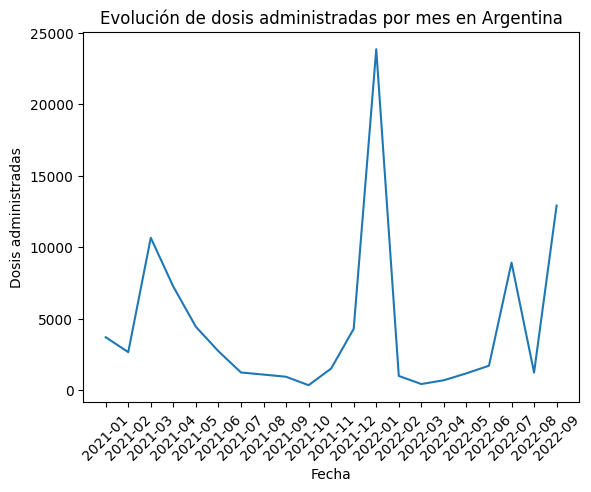

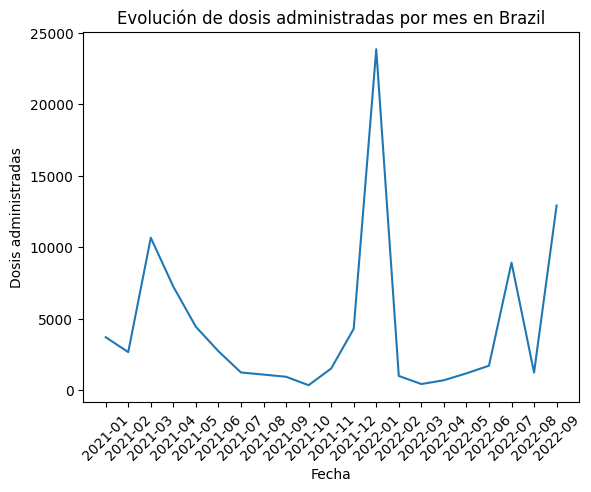

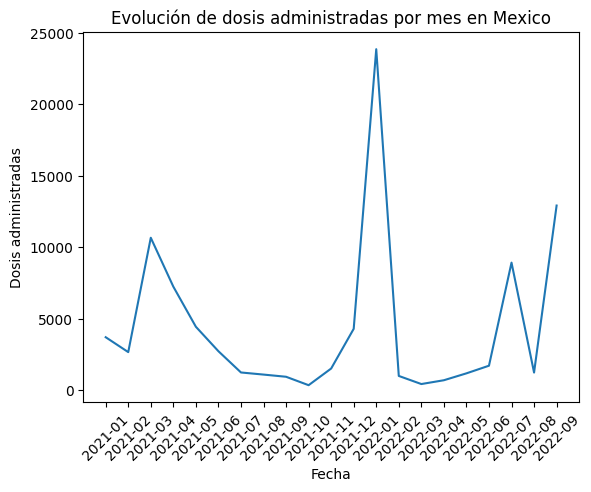

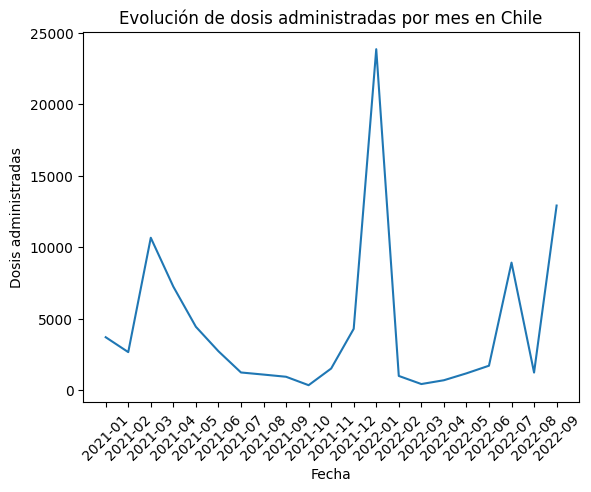

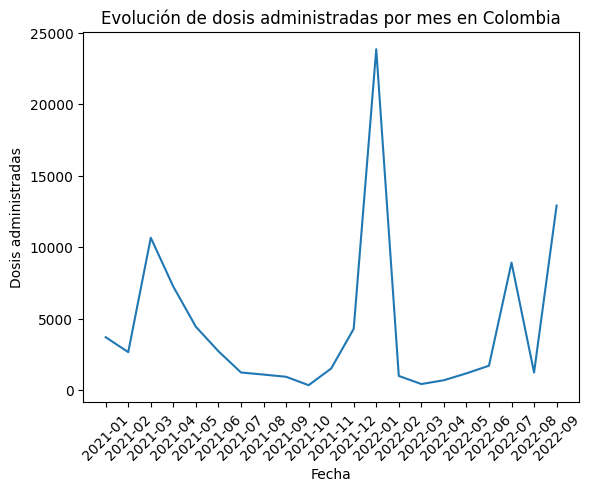

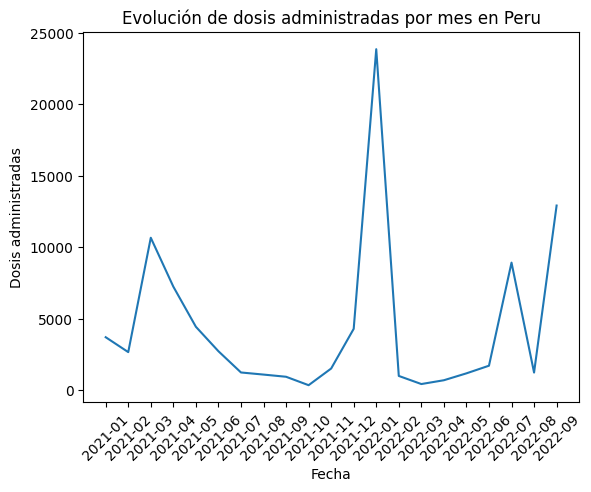

In [67]:
for pais in paises:
    data_pais = data_latam[data_latam['country_name']== pais]
    dosis_mes = data_latam.groupby('year_month')['cumulative_vaccine_doses_administered'].last().reset_index()
    fig,ax=plt.subplots()
    sns.lineplot(x=dosis_mes['year_month'].astype(str),y=dosis_mes['cumulative_vaccine_doses_administered'])
    plt.title(f'Evolución de dosis administradas por mes en {pais}')
    plt.xlabel('Fecha')
    plt.ylabel('Dosis administradas')
    plt.xticks(rotation=45)
    plt.show()


Muertes por país

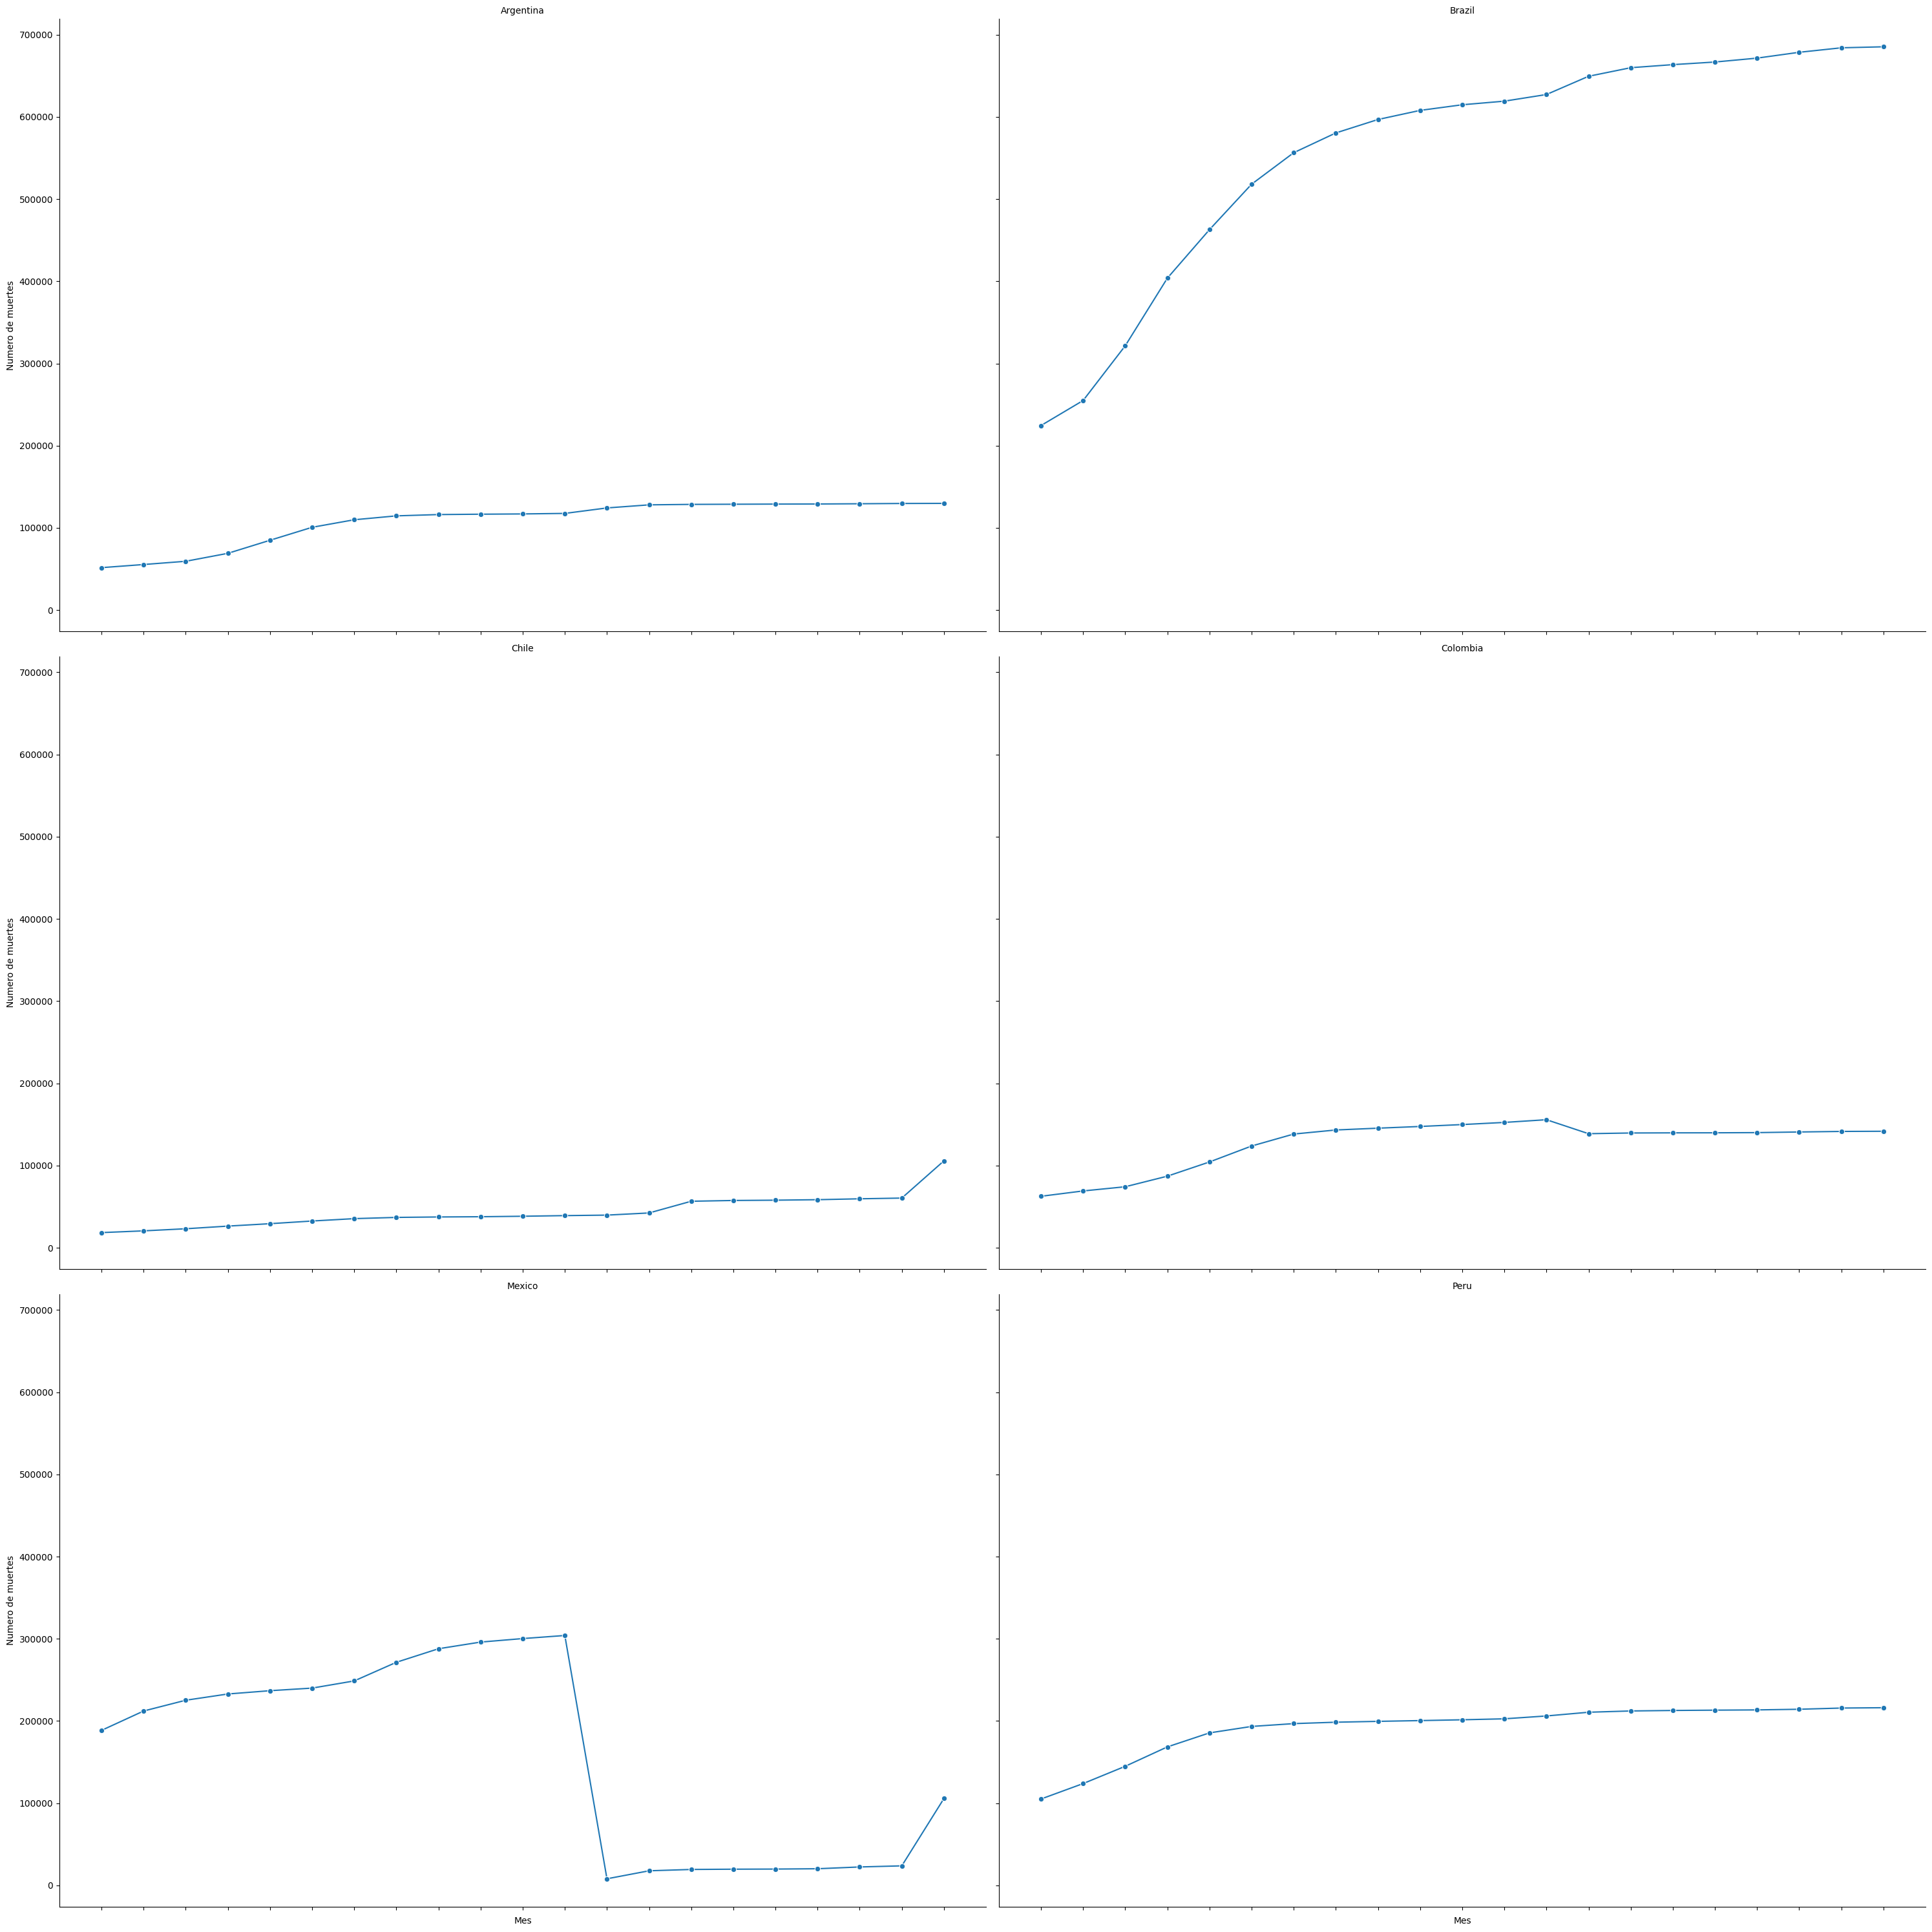

In [ ]:
#repetimos el proceso pero modificamos dosis por muertes
data_latam['year_month'] = data_latam['year_month'].astype(str)
muertes_mes_pais = data_latam.groupby(['country_name', 'year_month'])['cumulative_deceased'].max().reset_index()

#creamos un FacetGrid
g = sns.FacetGrid(
        muertes_mes_pais, 
        col='country_name', 
        margin_titles=False,
        despine=True,
        col_wrap = 2,
        height=10,
        aspect=1.5
    )


g.map(
    sns.lineplot, 
    'year_month', 
    'cumulative_deceased', 
    marker='o'
    )

g.set_axis_labels('Mes', 'Numero de muertes')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=45)  

plt.tight_layout()
plt.show()

Nuevos recuperados en cada mes por país

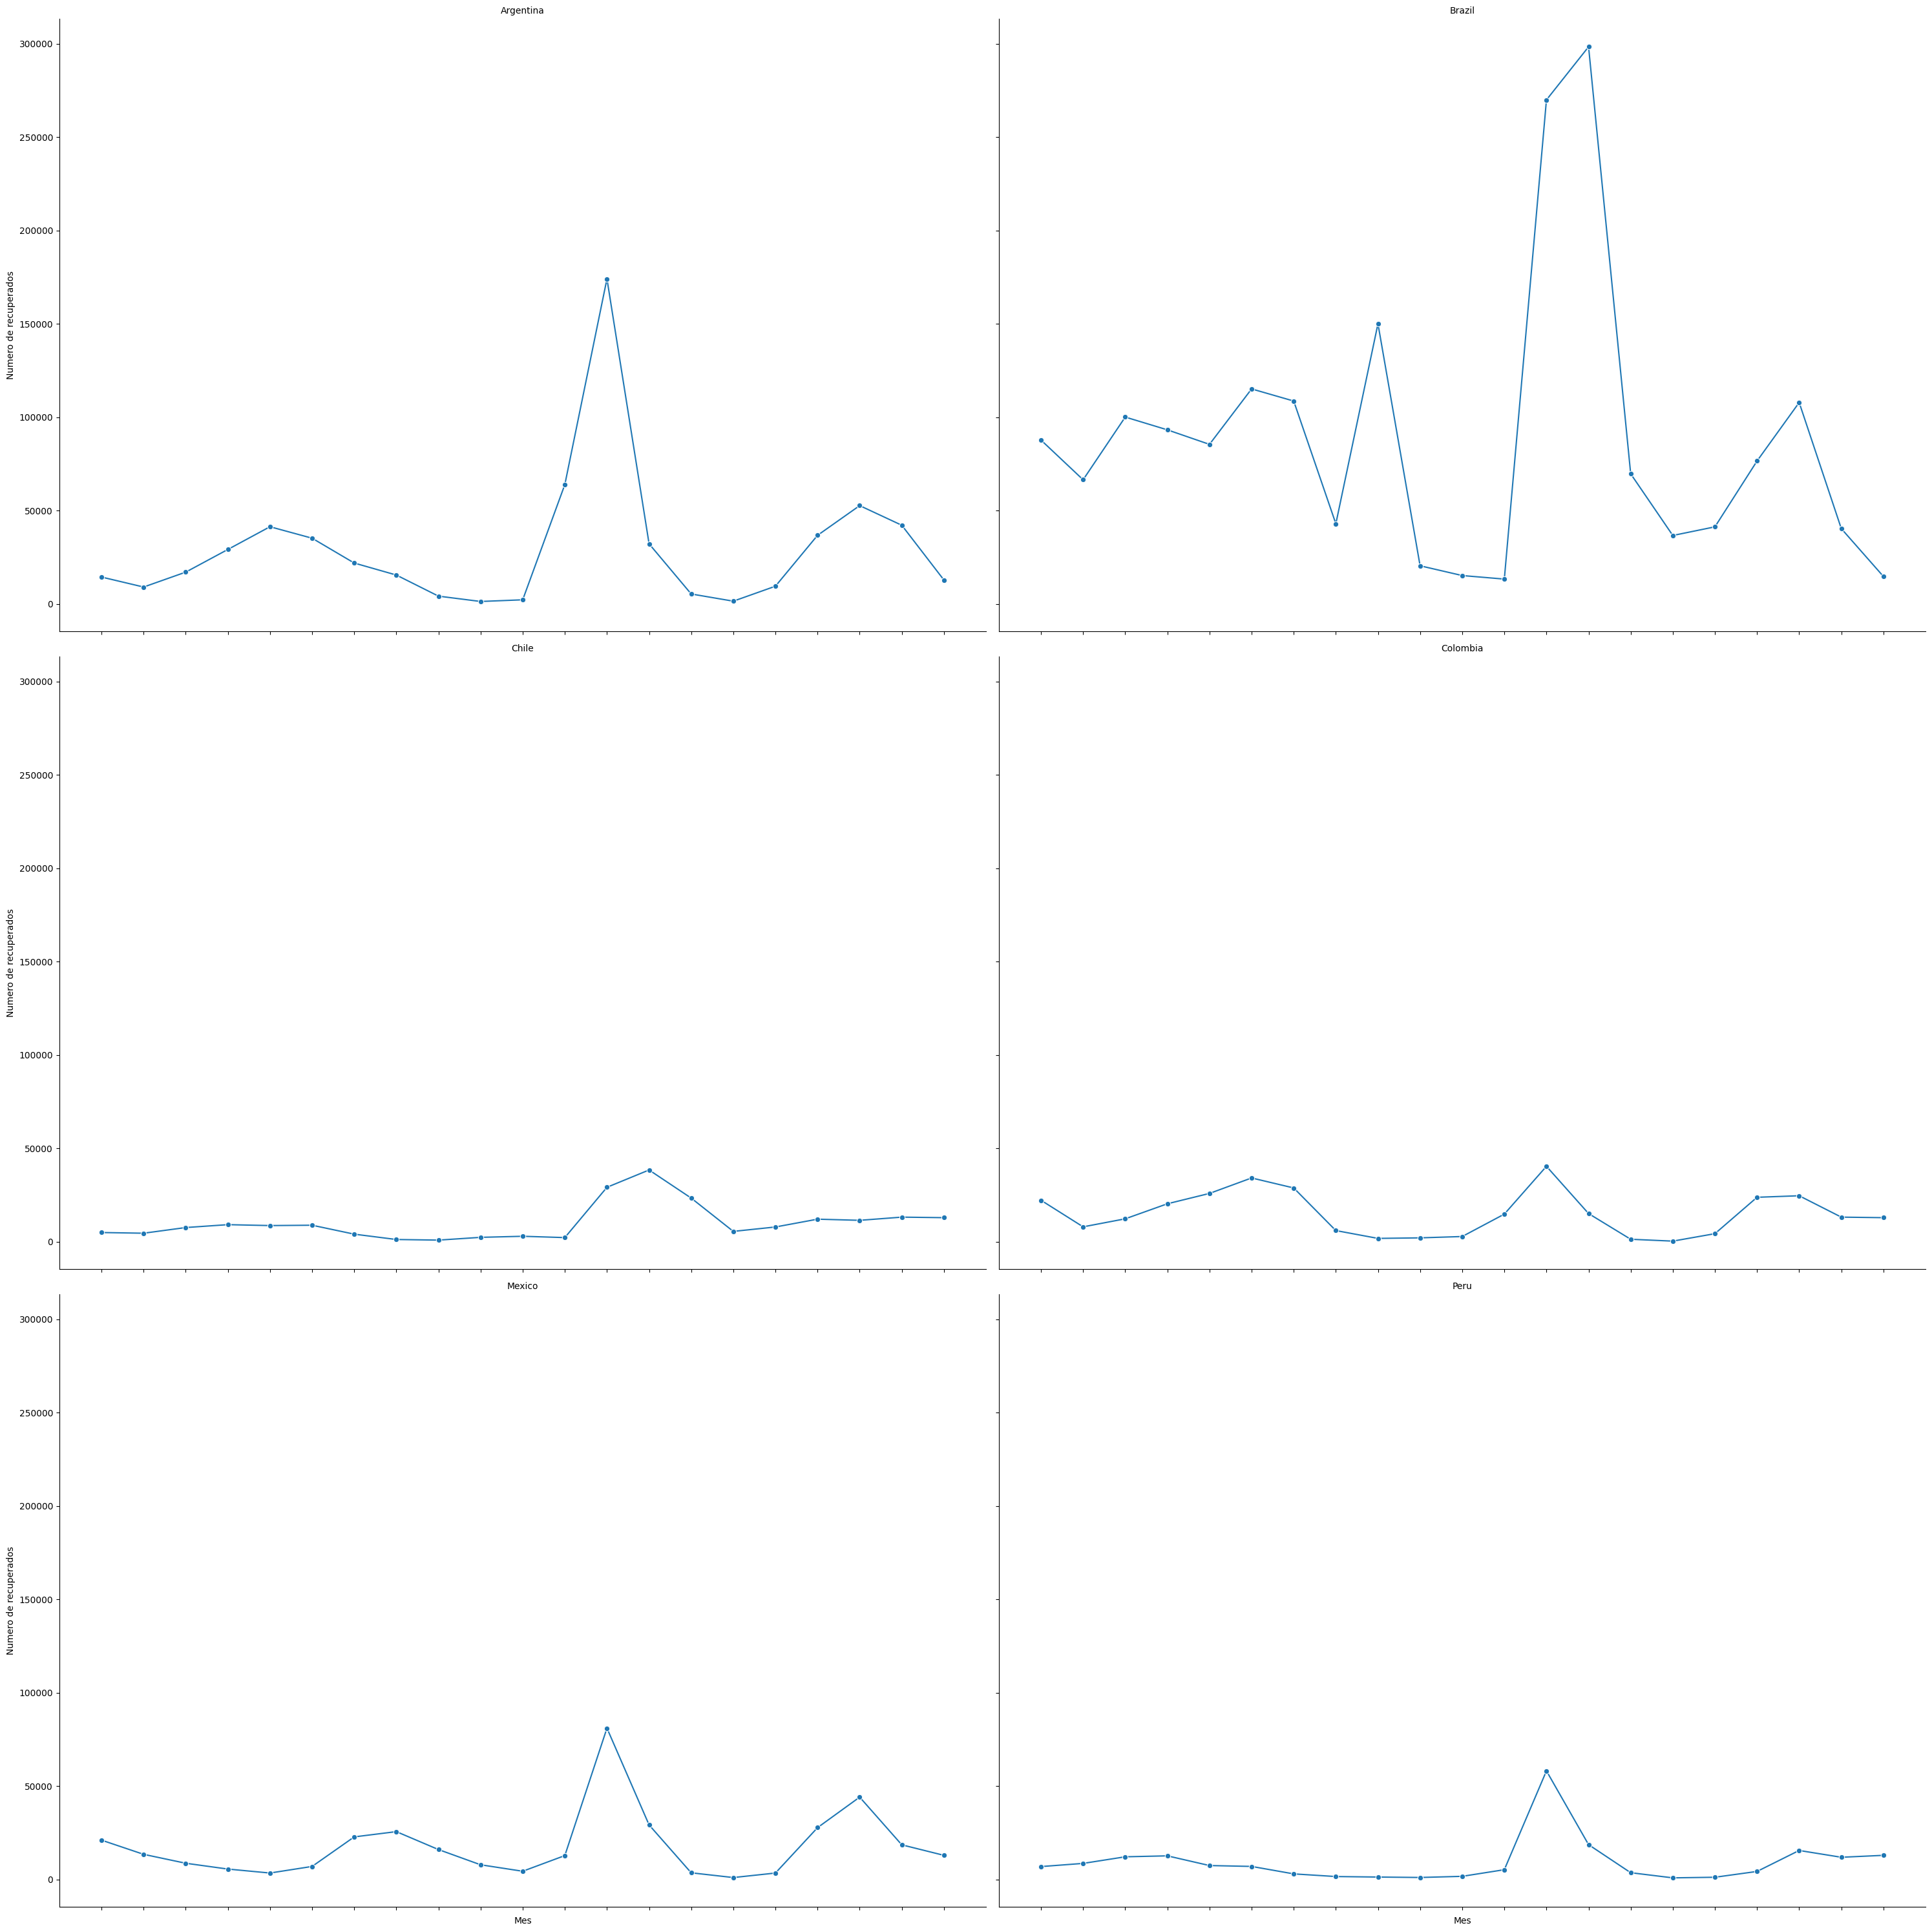

In [31]:
#nuevos recuperados
data_latam['year_month'] = data_latam['year_month'].astype(str)
recuperados_mes_pais = data_latam.groupby(['country_name', 'year_month'])['new_recovered'].max().reset_index()

g = sns.FacetGrid(
        recuperados_mes_pais, 
        col='country_name', 
        margin_titles=False,
        despine=True,
        col_wrap = 2,
        height=10,
        aspect=1.5
    )


g.map(
    sns.lineplot, 
    'year_month', 
    'new_recovered', 
    marker='o'
    )


g.set_axis_labels('Mes', 'Numero de recuperados')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=45)  


plt.tight_layout()
plt.show()

Comparacion de nuevos casos por país

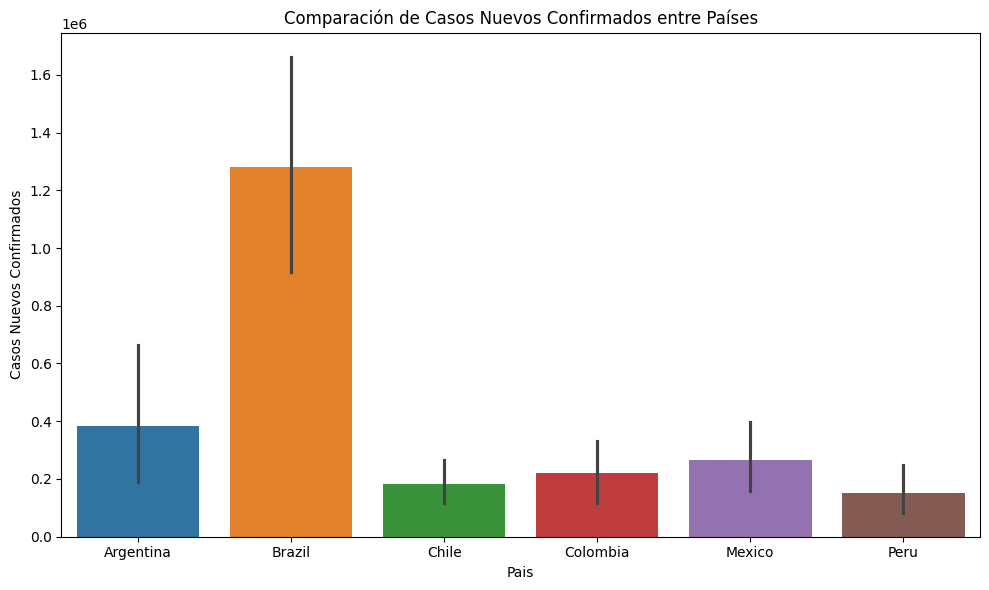

In [22]:
data_latam['year_month'] = data_latam['year_month'].astype(str)
casos_nuevos_pais = data_latam.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(
    data= casos_nuevos_pais,
    x='country_name',
    y='new_confirmed',
    hue='country_name',
)
plt.title('Comparación de Casos Nuevos Confirmados entre Países')
plt.xlabel('Pais')
plt.ylabel('Casos Nuevos Confirmados')
plt.tight_layout()
plt.show()

Comparacion de dosis por país

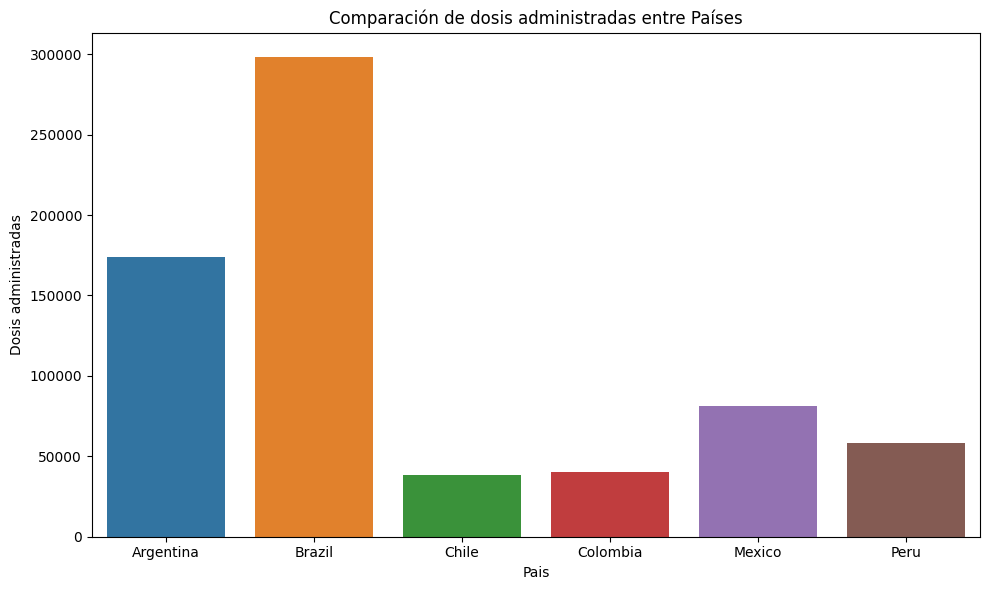

In [23]:
#data_latam['year_month'] = data_latam['year_month'].astype(str)
dosis_pais = data_latam.groupby(['country_name'])['cumulative_vaccine_doses_administered'].max().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data= dosis_pais,
    x='country_name',
    y='cumulative_vaccine_doses_administered',
    hue='country_name'
)
plt.title('Comparación de dosis administradas entre Países')
plt.xlabel('Pais')
plt.ylabel('Dosis administradas')
plt.tight_layout()
plt.show()

Boxplot de Promedio de temperatura por país  (mostrando los outliers)

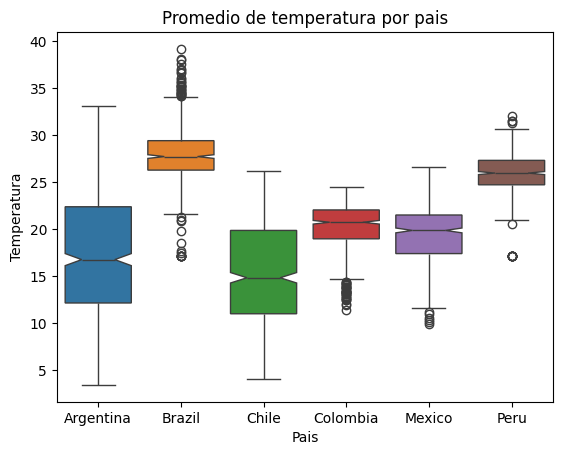

In [ ]:
sns.boxplot(
     data=data_latam,
    x="country_name",
    y="average_temperature_celsius",
    hue="country_name",
    notch=True
)

plt.title("Promedio de temperatura por pais")
plt.xlabel("Pais")
plt.ylabel("Temperatura")

plt.show()


Violinplot

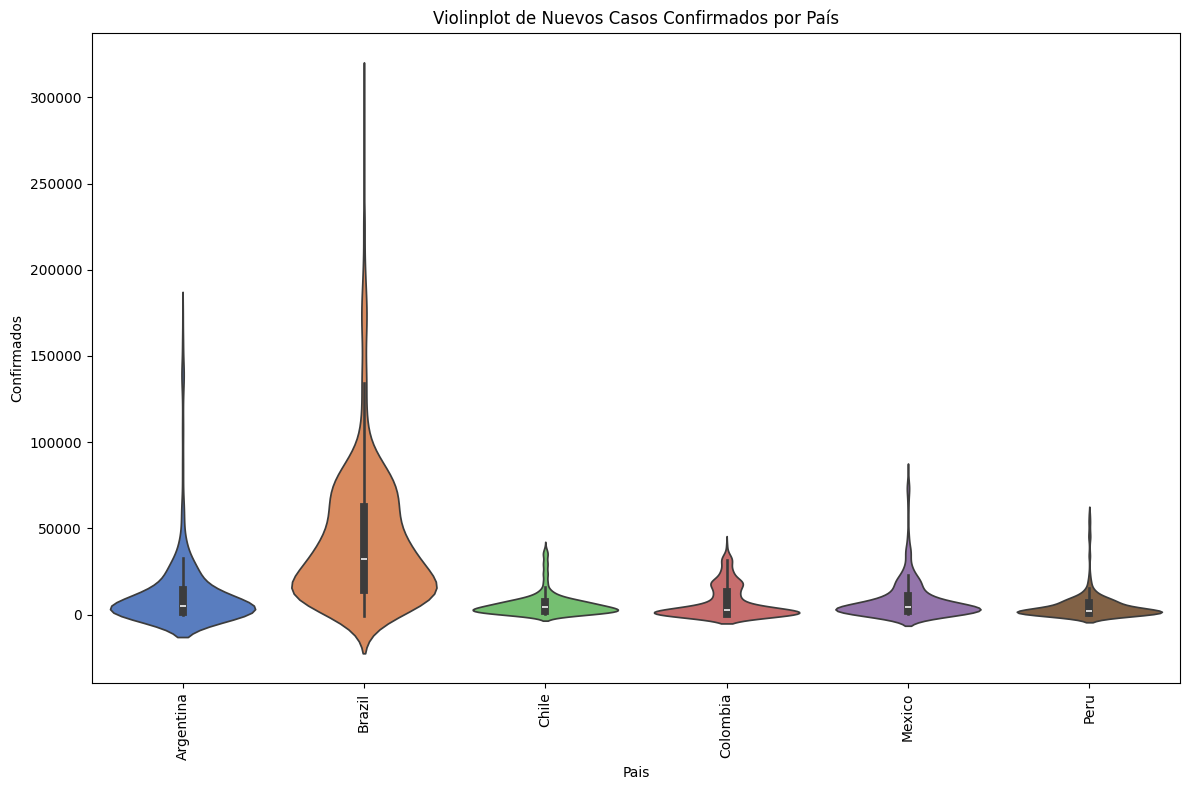

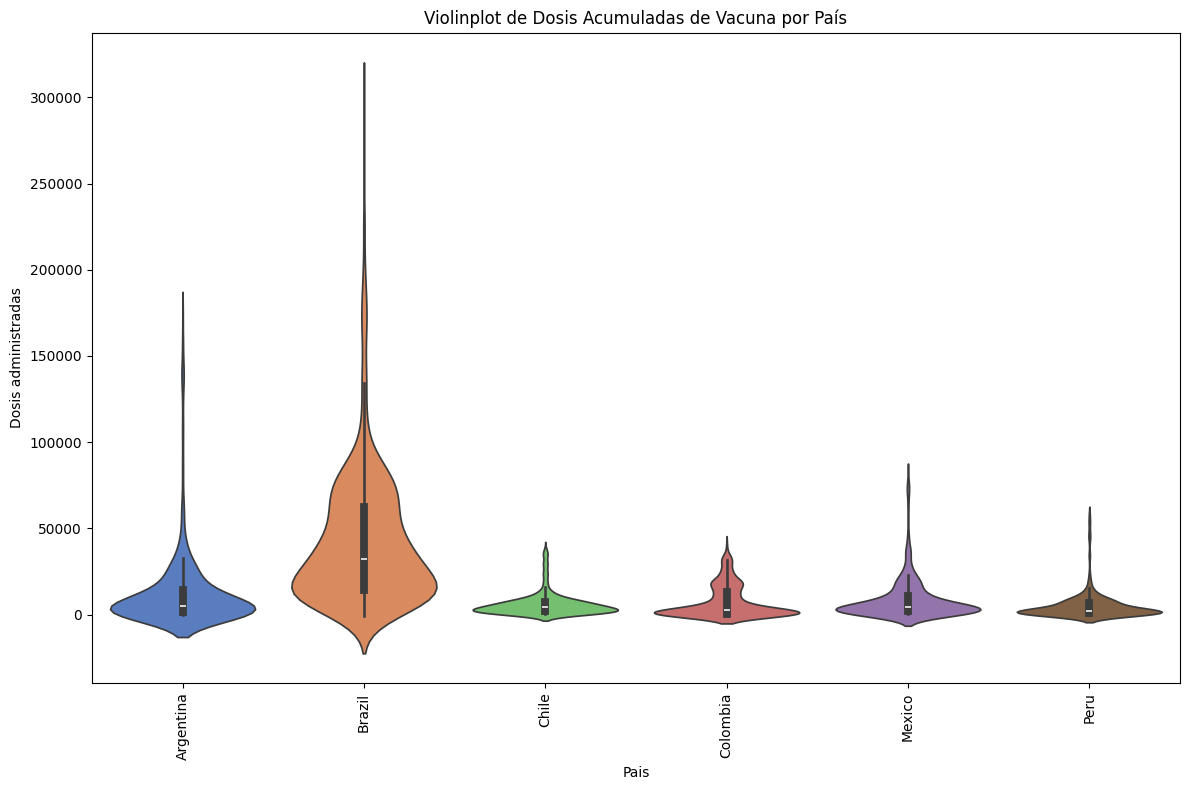

In [ ]:


# Filtramos las columnas que tienen variabilidad (más de un valor único)
columnas_con_variabilidad = data_latam.nunique()[data_latam.nunique() > 1].index.tolist()

# Filtramos las columnas relevantes 
variables = [
    'new_confirmed', 'new_deceased', 'new_recovered', 
    'cumulative_vaccine_doses_administered', 'gdp_per_capita_usd', 
    'population_density', 'life_expectancy', 'smoking_prevalence', 
    'diabetes_prevalence', 'average_temperature_celsius'
]

# Aseguramos de que las variables están en el conjunto de columnas con variabilidad
variables = [var for var in variables if var in columnas_con_variabilidad]

# Crear un Violinplot de las variables seleccionadas
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=data_latam,
    x='country_name',
    y='new_confirmed', 
    palette="muted",
    hue='country_name')

plt.title('Violinplot de Nuevos Casos Confirmados por País')
plt.xlabel('Pais')
plt.ylabel('Confirmados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear un Violinplot para la dosis acumulada de vacuna
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=data_latam,
    x='country_name',
    y='cumulative_vaccine_doses_administered',
    palette="muted",
    hue='country_name')
plt.title('Violinplot de Dosis Acumuladas de Vacuna por País')
plt.xlabel('Pais')
plt.ylabel('Dosis administradas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Distribución de la población por grupos de edad

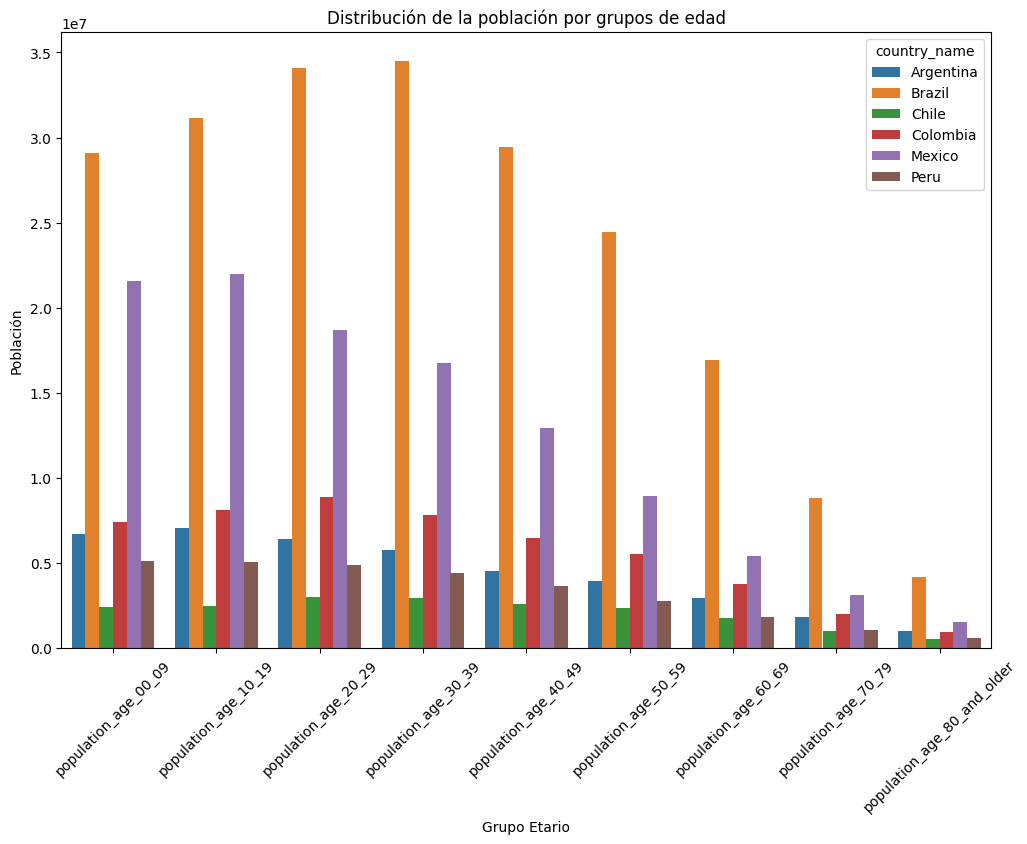

In [ ]:
#Columnas que marcan la edad de la poblacion
columnas_edad = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

#Concatenamos el nombre del país con las columnas de edad
# Luego utilizamos melt para transformar el DataFrame en formato largo

df_edad = data_latam[['country_name'] + columnas_edad]
df_edad = df_edad.melt(id_vars='country_name', var_name='age_group', value_name='population')

#Creación de grafico de barras
plt.figure(figsize=(12,8))
sns.barplot(
    data=df_edad,
    x='age_group',
    y='population',
    hue='country_name'
)
plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupo Etario')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.show()

Mapa de calor de métricas por país

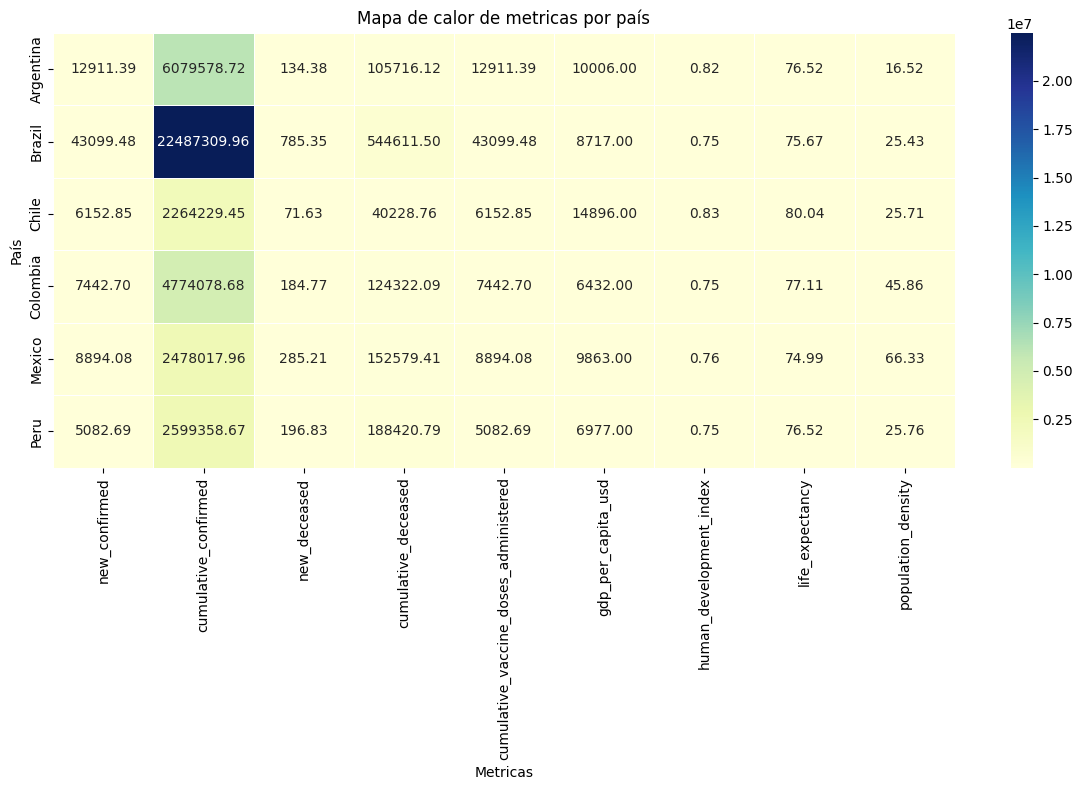

In [26]:
metricas = ['new_confirmed', 'cumulative_confirmed', 'new_deceased', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'gdp_per_capita_usd', 'human_development_index',
    'life_expectancy', 'population_density']

metricas_pais = data_latam.groupby('country_name')[metricas].mean()

plt.figure(figsize=(12,8))
sns.heatmap(
    metricas_pais,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Mapa de calor de metricas por país')
plt.xlabel('Metricas')
plt.ylabel('País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

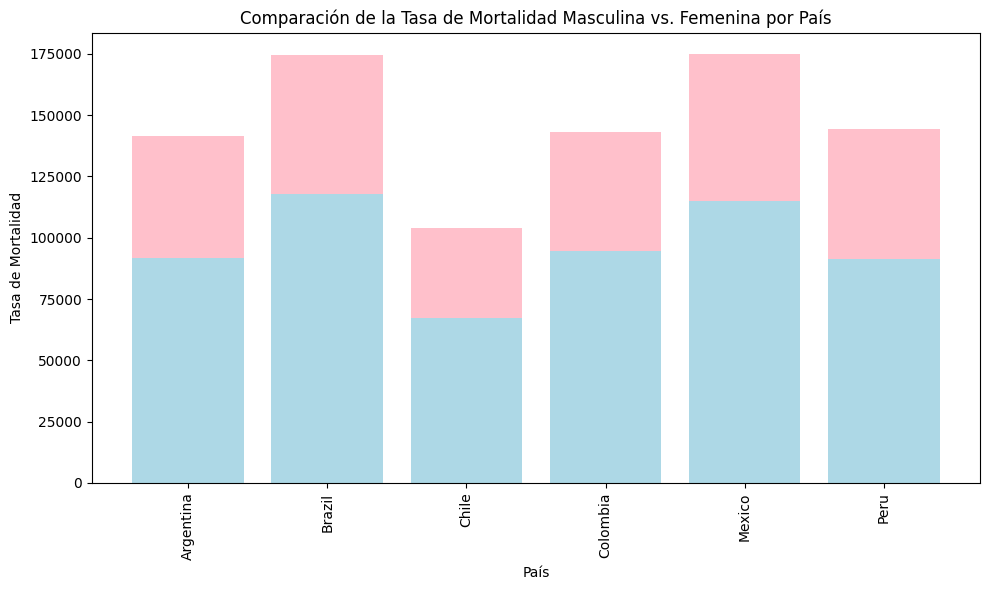

In [ ]:
df_agrupado = data_latam.groupby('country_name').agg({'adult_male_mortality_rate': 'sum','adult_female_mortality_rate': 'sum'}).reset_index()


fig, ax = plt.subplots(figsize=(10, 6))

# Usamos la función 'bar' para crear las barras apiladas
ax.bar(df_agrupado['country_name'], df_agrupado['adult_male_mortality_rate'], label='Mortalidad Masculina', color='lightblue')
ax.bar(df_agrupado['country_name'], df_agrupado['adult_female_mortality_rate'], label='Mortalidad Femenina', color='pink', bottom=df_agrupado['adult_male_mortality_rate'])


ax.set_xlabel('País')
ax.set_ylabel('Tasa de Mortalidad')
ax.set_title('Comparación de la Tasa de Mortalidad Masculina vs. Femenina por País')

plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Matriz de Correlación de Indicadores Demográficos y de Salud

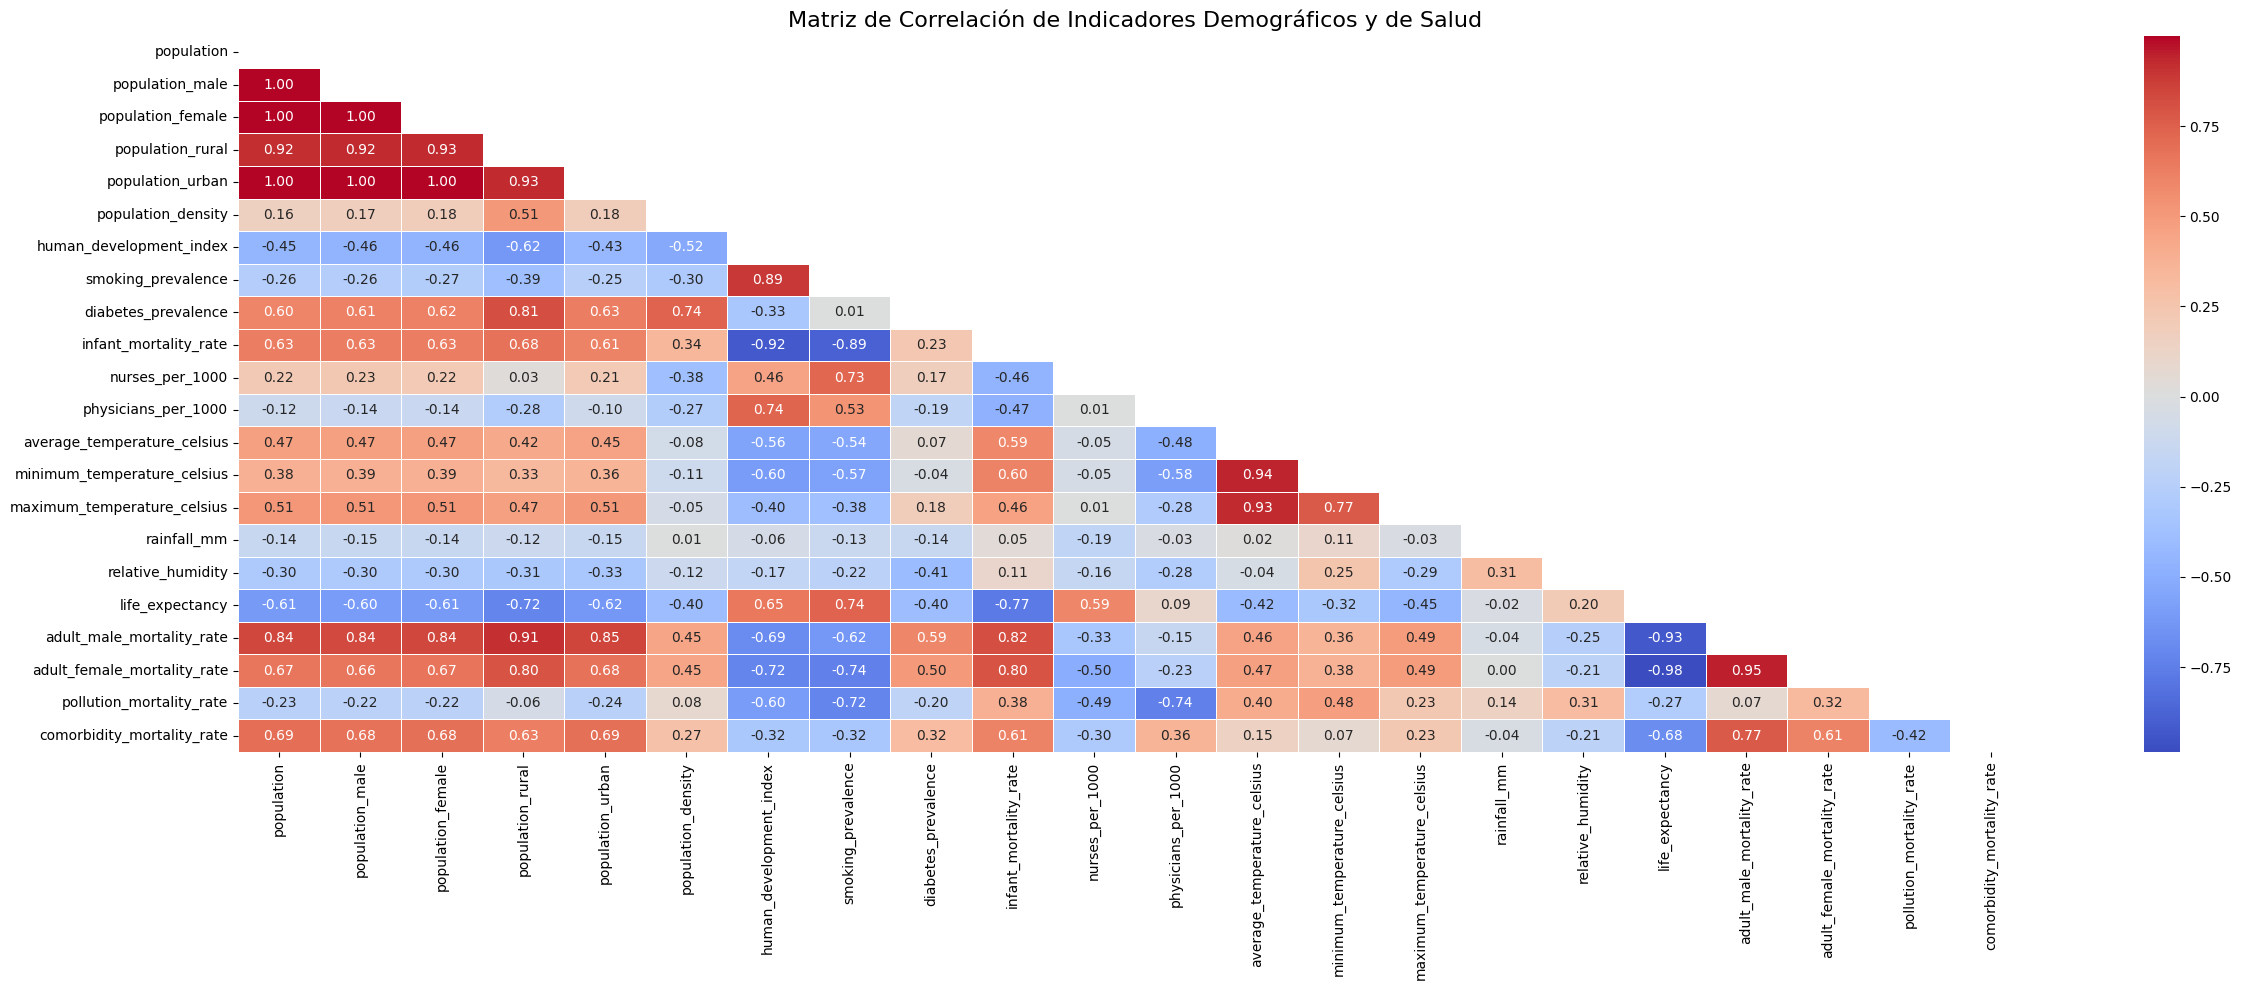

In [ ]:
# Seleccionamos las columnas relevantes
columnas_de_interes = [
    'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 
    'population_density', 'human_development_index',
    'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 
    'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
    'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm',
    'relative_humidity', 'life_expectancy', 'adult_male_mortality_rate', 
    'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate'
]

# Creamos un nuevo DataFrame solo con las columnas de interés
df_seleccionado = data_latam[columnas_de_interes]

# Calculamos la matriz de correlación
matriz_correlacion = df_seleccionado.corr()

#mascara para filtrar los valores de la parte superior del triangulo
mascara = np.triu(np.ones_like(matriz_correlacion,dtype=bool))
# Creamos una visualización con un heatmap de la matriz de correlación
plt.figure(figsize=(25, 10))  
sns.heatmap(
            matriz_correlacion, #data 
            mask= mascara,
            annot=True, #Con true aseguramos que aparezcan los valores
            cmap='coolwarm', #colores de rojo a azul
            fmt='.2f', #cada valor tiene 2 decimales
            linewidths=0.5 #ancho de lineas
            )


plt.title('Matriz de Correlación de Indicadores Demográficos y de Salud', fontsize=16)


plt.tight_layout()
plt.show()

Relación entre Tasa de mortalidad y Prevalencia de Diabetes

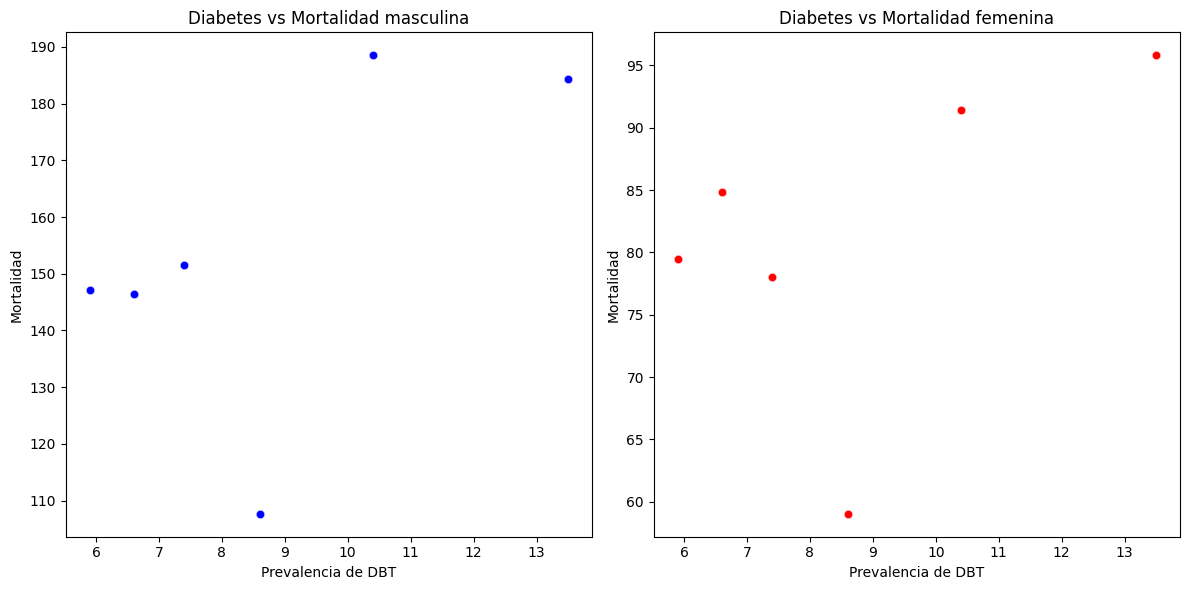

In [25]:

# Seleccion de las columnas relevantes
df_comparacion = data_latam[['diabetes_prevalence', 'adult_male_mortality_rate', 'adult_female_mortality_rate']]

# gráfico de dispersión para comparar Diabetes vs Mortalidad Masculina
fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.scatterplot(
            data = df_comparacion,
            x='diabetes_prevalence',
            y='adult_male_mortality_rate', 
            alpha=0.6,#grado de transparencia 
            color='blue',
            ax=ax1
            )
ax1.set_title('Diabetes vs Mortalidad masculina')
ax1.set_xlabel('Prevalencia de DBT')
ax1.set_ylabel('Mortalidad')

# grafico de dispersión para comparar Diabetes vs Mortalidad Femenina
sns.scatterplot(
            data= df_comparacion,
            x='diabetes_prevalence',
            y='adult_female_mortality_rate', 
            alpha=0.6, 
            color='red',
            ax=ax2
            )
ax2.set_title('Diabetes vs Mortalidad femenina')
ax2.set_xlabel('Prevalencia de DBT')
ax2.set_ylabel('Mortalidad')


plt.tight_layout()
plt.show()


#### Identificacion de Patrones y tendencias:
Chile es de los países con menor población y menor vacunación, pero tiene una alta tasa de enfermeras.
Brasil es de los países con mayor población y mayor vacunación, sin embargo tiene pocos profesionales para la población que tiene. 
Entre fines de 2021 y principios de 2022 es que aumentaron las dosis de vacunación, coincidiendo con el aumento en el numero de recuperados y un amesetamiento en el numero de muertes. En mexico incluso disminuyeron la cantidad de muertes a partir de 2022
México tiene un alto pbi, una gran concentración demográfica pero una baja cantidad de profesionales de la salud para la atención de su poblacion, la cual tiene la mas álta prevalencia de diabetes en los países a analizar y es el tercero más alto en prevalencia de fumadores.
Es una buena estrategia para la empresa que el objetivo prioritario sea en este país.


La mayor tasa de mortalidad se da en hombres.
A mayor incidencia de diabetes, mayor indice de muertes.

---------------------------------------------------------------

#### Avance 3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data_latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             3744 non-null   int64  
 1   location_key                           3744 non-null   object 
 2   date                                   3744 non-null   object 
 3   country_code                           3744 non-null   object 
 4   country_name                           3744 non-null   object 
 5   new_confirmed                          3723 non-null   float64
 6   new_deceased                           3723 non-null   float64
 7   cumulative_confirmed                   3723 non-null   float64
 8   cumulative_deceased                    3723 non-null   float64
 9   cumulative_vaccine_doses_administered  3160 non-null   float64
 10  population                             3744 non-null   float64
 11  popu

In [ ]:
data_latam['date']= pd.to_datetime(data_latam['date'])
#El 'date' estaba tomado como un objeto, por lo tanto tuve que modificarlo.


In [ ]:
data_latam.set_index('date',inplace=True)
#Luego de convertir 'date' de objeto a datetime,lo volvemos a setear como indice

### Analisis de Series temporales

Evolucion de casos activos

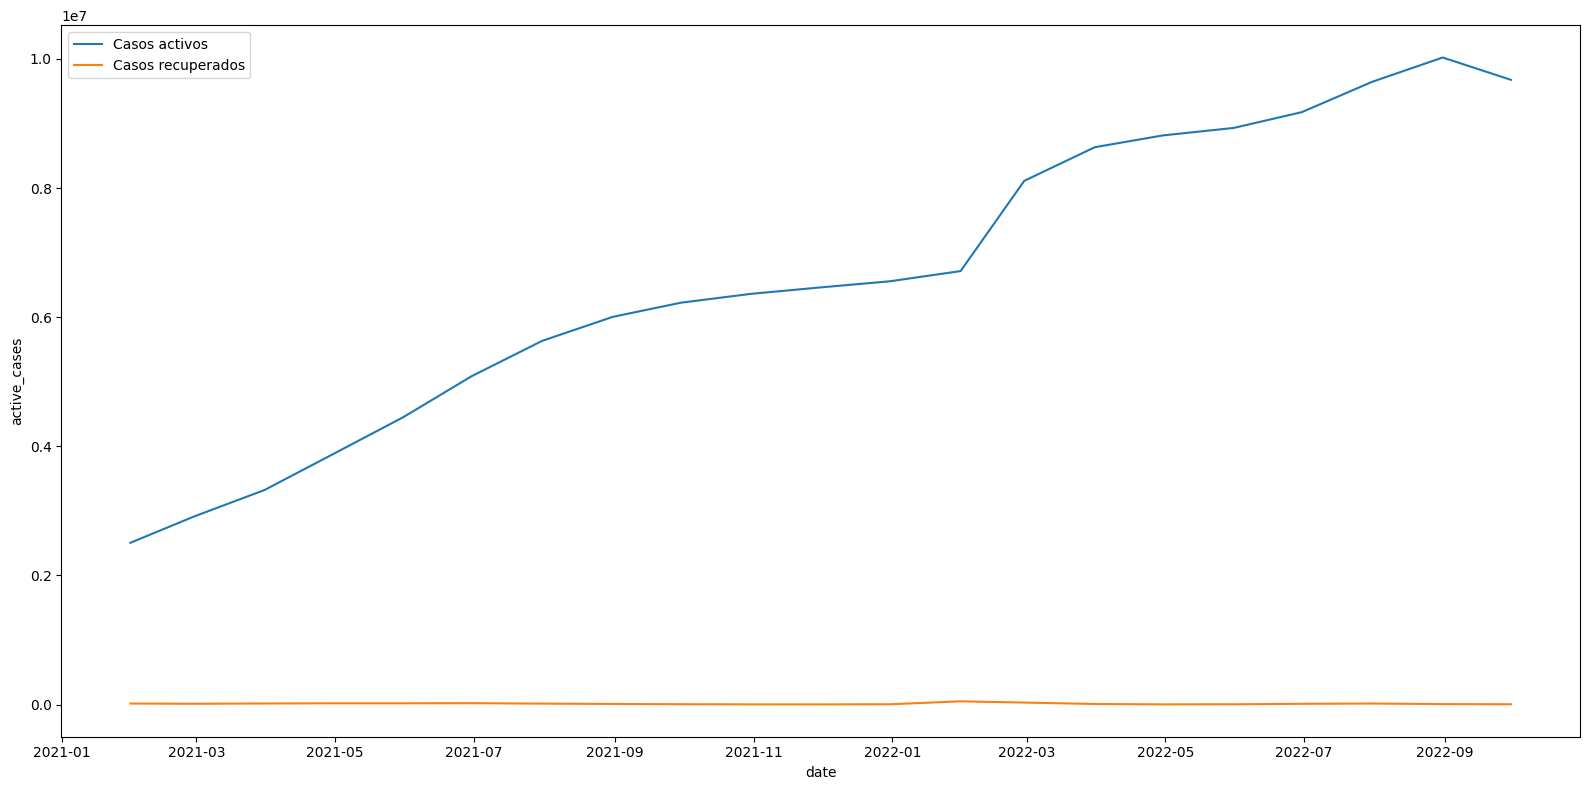

In [39]:
data_latam['active_cases']=  data_latam['cumulative_confirmed']- data_latam['cumulative_deceased'] - data_latam['cumulative_recovered']

plt.figure(figsize=(16,8))
sns.lineplot(
    data=data_latam.select_dtypes(include=['float64','int64']).resample('M').mean(),
    x='date',
    y='active_cases',
    label='Casos activos'
)
sns.lineplot(
    data=data_latam.select_dtypes(include=['float64','int64']).resample('M').mean(),
    x='date',
    y='cumulative_recovered',
    label='Casos recuperados'

)


plt.tight_layout()
plt.show()

### Tasa de Crecimiento mensual

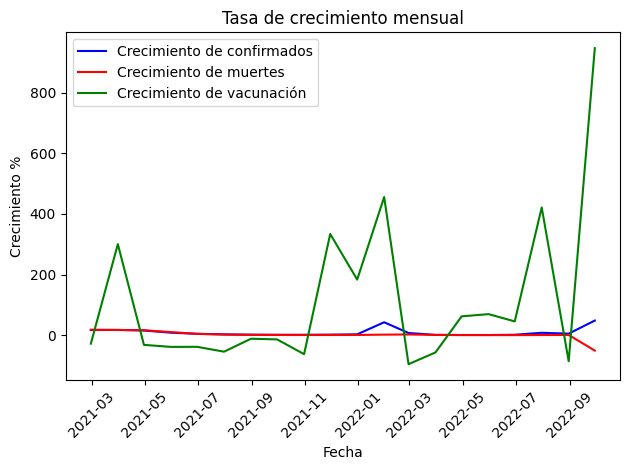

In [ ]:
data_latam.index = pd.to_datetime(data_latam.index)
data_mensual = data_latam.resample('M').last()

data_mensual['crecimiento_casos'] = data_mensual['cumulative_confirmed'].pct_change()*100
data_mensual['crecimiento_muertes'] = data_mensual['cumulative_deceased'].pct_change()*100
data_mensual['crecimiento_dosis'] = data_mensual['cumulative_vaccine_doses_administered'].pct_change()*100
#.pct_change() calcula el cambio porcentual en nuevos confirmados y a eso lo multiplicamos por 100
#de esta forma obtenemos el porcentaje de modificacion
plt.figure()

sns.lineplot(
    data=data_mensual,
    x=data_mensual.index,
    y='crecimiento_casos',
    label='Crecimiento de confirmados',
    color='b'
)

sns.lineplot(
    data=data_mensual,
    x=data_mensual.index,
    y='crecimiento_muertes',
    label='Crecimiento de muertes',
    color='r'
)

sns.lineplot(
    data=data_mensual,
    x=data_mensual.index,
    y='crecimiento_dosis',
    label='Crecimiento de vacunación',
    color='g'
)

plt.title('Tasa de crecimiento mensual')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Relacion entre cobertura de vacunacion y reduccion de casos

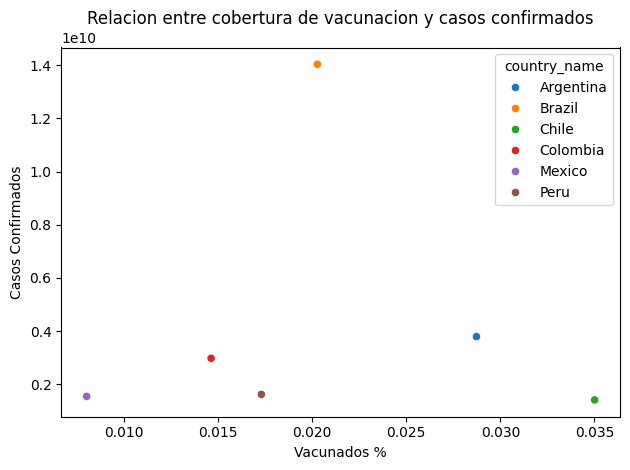

In [64]:
#data_latam = data_latam.reset_index()
data_latam= data_latam.sort_values(by=['country_name','date'])

data_latam['porcentaje_vacunados'] = (data_latam['cumulative_vaccine_doses_administered']/data_latam['population'])*100

cobertura = data_latam.groupby('country_name').agg({'porcentaje_vacunados':'mean','cumulative_confirmed':'sum'})

plt.figure()
sns.scatterplot(
    data=cobertura,
    x='porcentaje_vacunados',
    y='cumulative_confirmed',
    hue='country_name'
)

plt.title('Relacion entre cobertura de vacunacion y casos confirmados')

plt.xlabel('Vacunados %')
plt.ylabel('Casos Confirmados')
plt.tight_layout()
plt.show()

Progresion de la vacunacion por mes


In [71]:
data_latam.drop('level_0',axis=1,inplace=True)

In [73]:
data_latam.drop('index',axis=1,inplace=True)

In [75]:
data_latam.set_index('date')

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                            7767.000000  44938712.0   
2021-01-03                            4934.000000  44938712.0   
2021-01-04                           13953.000000  44938712.0   
2021-01-05                           14085.000000  44938712.0   
2021-01-06                           14496.000000  44938712.0   
...                                           ...         ...   
2022-09-13                            1150.000000  29381884.0   
2022-09-14                           12911.385484  29381884.0   
2022-09-15                           12911.385484  29381884.0   
2022-09-16                           12911.385484  29381884.0   
2022-09-17                           12911.385484  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [77]:
data_latam=pd.to_datetime(data_latam.index)

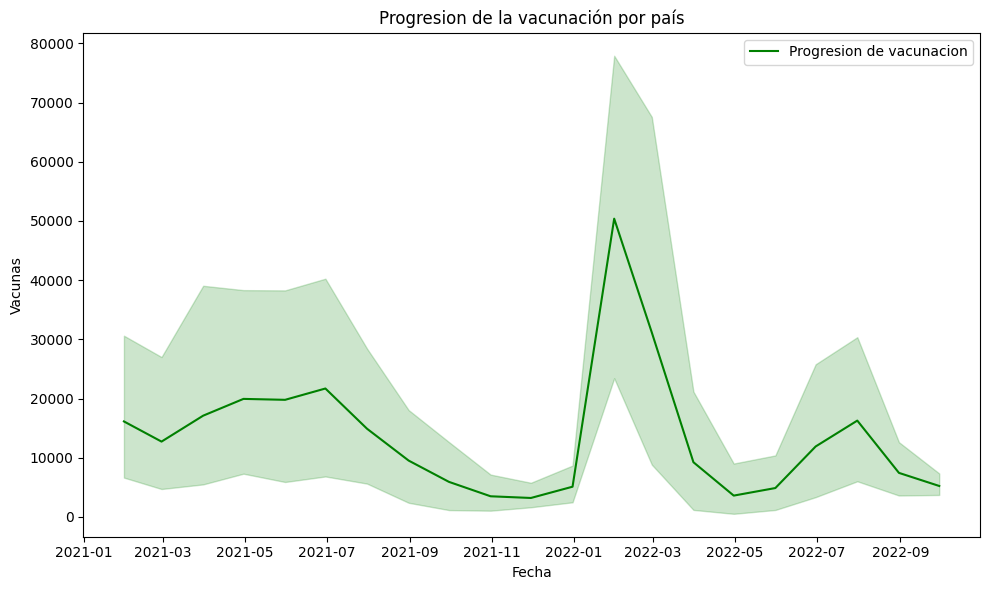

In [ ]:
#Progresion de la vacunacion por mes

dosis_mensuales = data_latam.groupby('country_name')['cumulative_vaccine_doses_administered'].resample('M').mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(
    data=dosis_mensuales,
    x='date',
    y='cumulative_vaccine_doses_administered',
    #label='Progresion de vacunacion',
    color='g'
    )

plt.title('Progresion de la vacunación por país')
plt.xlabel('Fecha')
plt.ylabel('Vacunas')
plt.tight_layout()
plt.show()

Relacion entre temperatura promedio y cantidad de casos

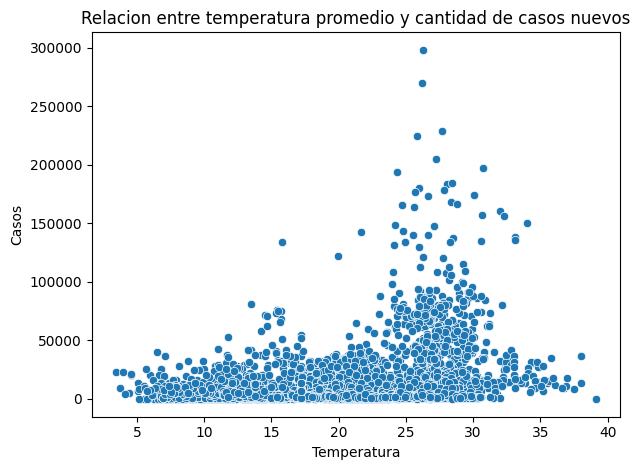

In [60]:
plt.figure()
sns.scatterplot(
    data=data_latam,
    x='average_temperature_celsius',
    y='new_confirmed',
)

plt.title('Relacion entre temperatura promedio y cantidad de casos nuevos')
plt.xlabel('Temperatura')
plt.ylabel('Casos')

plt.tight_layout()
plt.show()

In [62]:
correlacion_temp_casos = data_latam[['average_temperature_celsius', 'new_confirmed']].corr().iloc[0, 1]
correlacion_temp_casos


0.2656797062893682

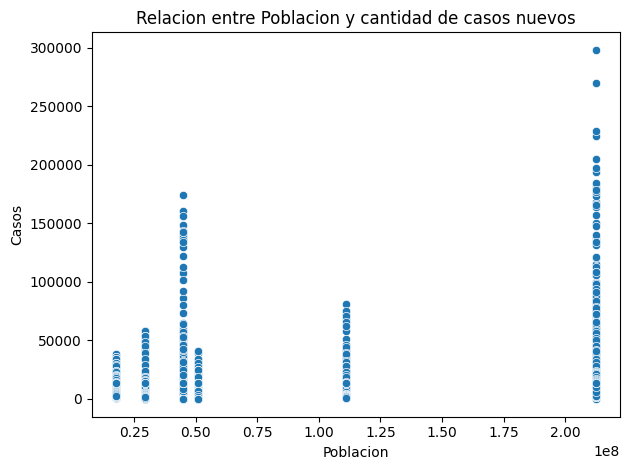

In [61]:
plt.figure()
sns.scatterplot(
    data=data_latam,
    x='population',
    y='new_confirmed',
)

plt.title('Relacion entre Poblacion y cantidad de casos nuevos')
plt.xlabel('Poblacion')
plt.ylabel('Casos')

plt.tight_layout()
plt.show()

In [ ]:
correlacion_urb_casos = data_latam[['population_urban', 'new_confirmed']].corr()
correlacion_urb_casos

0.4923398989867922

In [ ]:
cor_casos_temp = data_latam.groupby['average_temperature_celsius'].corr(data_latam['new_confirmed'])
print(f'La correlacion entre temperatura y nuevos casos es de {cor_casos_temp:.2f}')

TypeError: Categorical input must be list-like

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_latam,
    x='average_temperature_celsius',
    y='new_confirmed'
)
plt.title('Relacion entre nuevos casos y la temperatura promedio')
plt.xlabel('Temperatura')
plt.ylabel('Casos')

plt.tight_layout()
plt.show()

Relación entre urbanización y casos de COVID 19

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_latam,
    x='population_urban',
    y='new_confirmed'
)
plt.title('Relacion entre poblacion y casos')
plt.xlabel('Población')
plt.ylabel('Casos')
plt.show()

In [ ]:

corr_urbanizacion = data_latam['population_urban'].corr(data_latam['new_confirmed'])
corr_urbanizacion


country_name
Argentina   -4.920991e-16
Brazil       3.396444e-16
Chile                 NaN
Colombia    -1.334726e-15
Mexico                NaN
Peru        -7.796363e-16
dtype: float64

# mapa de calor para ver correlacion entre casos, poblacion y temperatura

In [ ]:
columnas= ['new_confirmed' , 'average_temperature_celsius' ,'population_urban','population_rural']

correlation_matrix = data_latam[columnas].corr()

plt.figure()
sns.heatmap(
    correlation_matrix,
    annot = True,
    cmap = 'coolwarm',
    vmin = -1,
    vmax= 1,
    fmt='.2f',
)
plt.title('Heatmap de casos, temperatura y poblacion')

plt.show()

Nuevos casos por semana

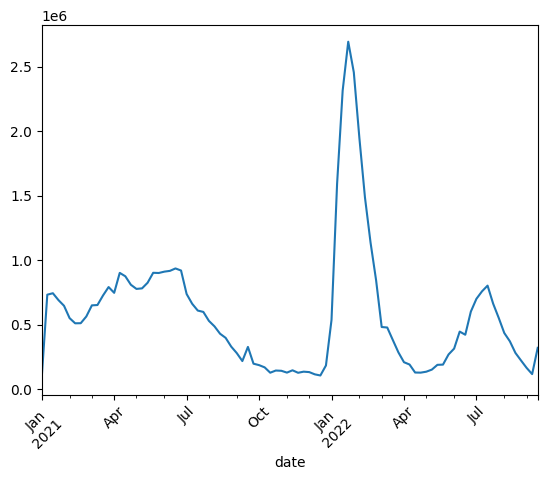

In [39]:
casos_semanales = data_latam['new_confirmed'].resample('W').sum()

casos_semanales.plot(kind='line')
plt.xticks(rotation=45)
plt.show()


Evolucion anual de casos

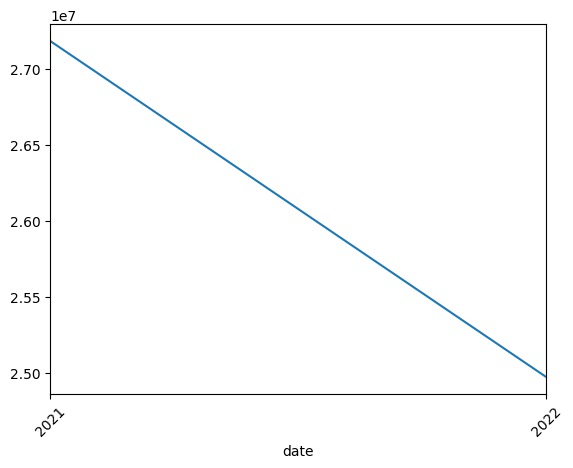

In [45]:
casos_anuales = data_latam['new_confirmed'].resample('Y').sum()

casos_anuales.plot(kind='line')
plt.xticks(rotation=45)
plt.show()

Evaluacion Mensual de casos

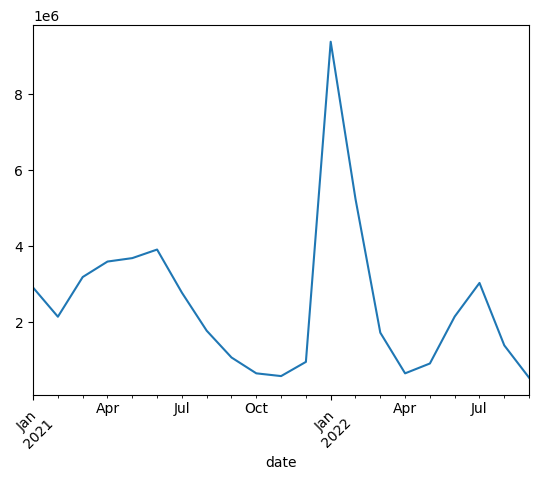

In [47]:
casos_mensuales = data_latam['new_confirmed'].resample('M').sum()

casos_mensuales.plot(kind='line')
plt.xticks(rotation=45)
plt.show()

Evolucion mensual de muertes

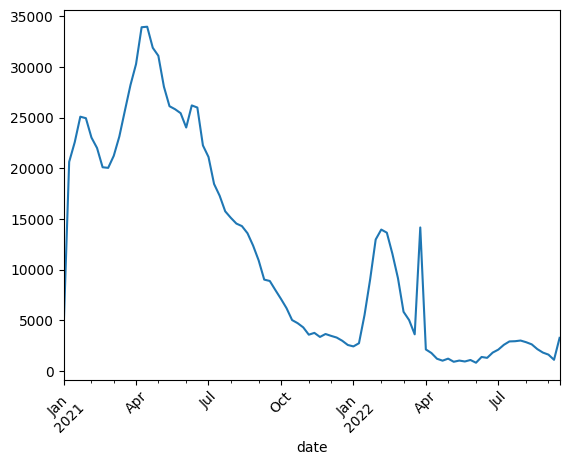

In [48]:
muertes_mensuales = data_latam['new_deceased'].resample('W').sum()

muertes_mensuales.plot(kind='line')
plt.xticks(rotation=45)
plt.show()

## Distribucion de la población por países

<Figure size 1400x800 with 0 Axes>

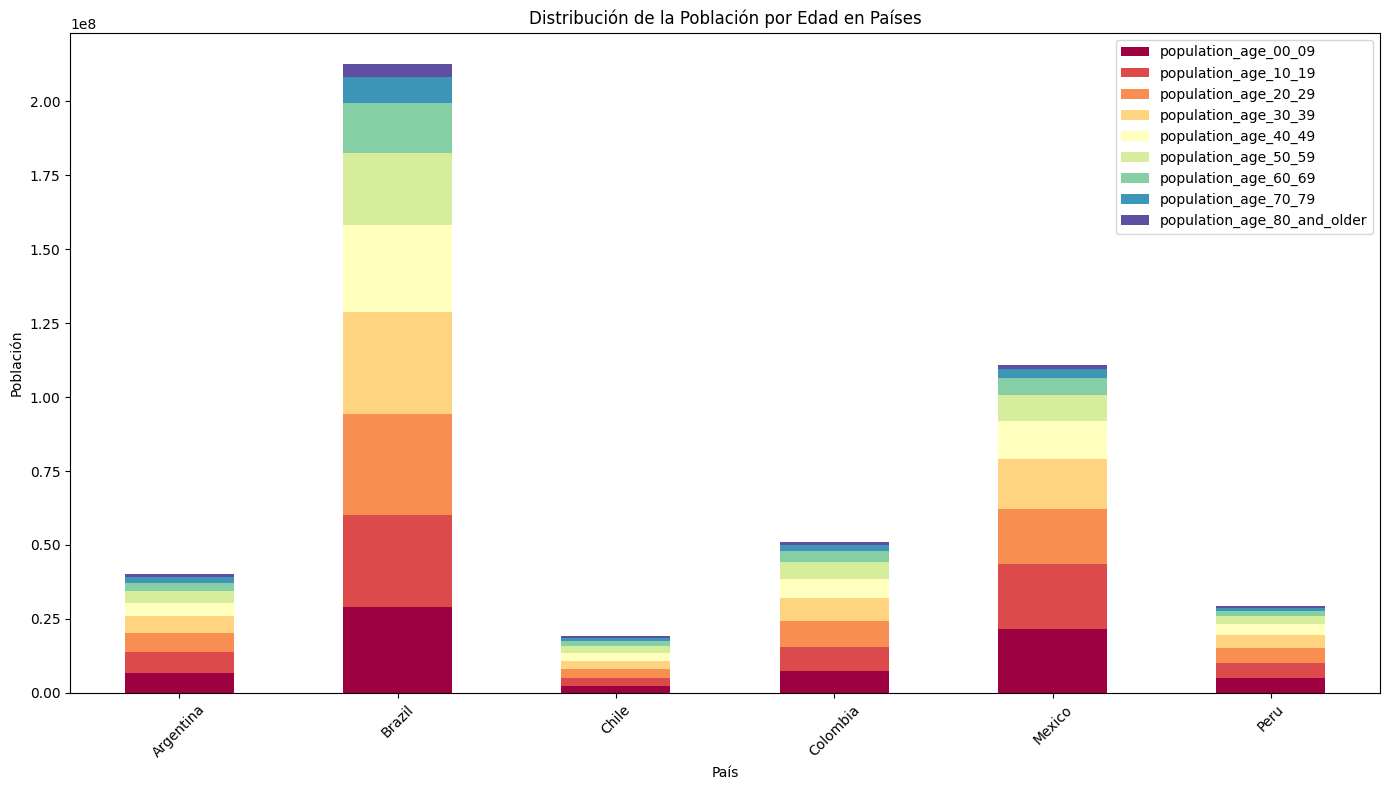

In [64]:

# Seleccionar las columnas relevantes de población por edad
age_columns = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Calcular la suma de la población por cada grupo de edad por país
poblacion_por_edad = data_latam.groupby('country_name')[age_columns].mean()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))

# Graficar las barras apiladas para la distribución de la población por edad
poblacion_por_edad.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Spectral')

# Título y etiquetas
plt.title('Distribución de la Población por Edad en Países')
plt.xlabel('País')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Porcentaje de vacunación de cada país

In [ ]:
data_latam['porcentaje_vacunacion'] = (data_latam['cumulative_vaccine_doses_administered']/data_latam['population'])*100

porcentaje_pais= data_latam.groupby('country_name')['porcentaje_vacunacion']


porcentaje_pais

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 7767.0  44938712.0   
2021-01-03                                 4934.0  44938712.0   
2021-01-04                                13953.0  44938712.0   
2021-01-05                                14085.0  44938712.0   
2021-01-06                                14496.0  44938712.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2021-01-02       19523766.0  ...           55032.0            76.52   
2021-01-03       19523766.0  ...           55032.0            76.52   
2021-01-04       19523766.0  ...           55032.0            76.52   
2021-01-05       19523766.0  ...           55032.0            76.52   
2021-01-06       19523766.0  ...           55032.0            76.52   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06                    147.086                       79.483   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2021-01-02                      26.6                        15.8   
2021-01-03                      26.6                        15.8   
2021-01-04                      26.6                        15.8   
2021-01-05                      26.6                        15.8   
2021-01-06                      26.6                        15.8   

            new_recovered  cumulative_recovered  year_month  \
date                                                          
2021-01-02         7767.0                7767.0     2021-01   
2021-01-03         4934.0                4934.0     2021-01   
2021-01-04        13953.0               13953.0     2021-01   
2021-01-05        14085.0               14085.0     2021-01   
2021-01-06        14496.0               14496.0     2021-01   

            porcentaje_vacunacion  
date                               
2021-01-02               0.017284  
2021-01-03               0.010979  
2021-01-04               0.031049  
2021-01-05               0.031343  
2021-01-06               0.032257  

[5 rows x 51 columns]

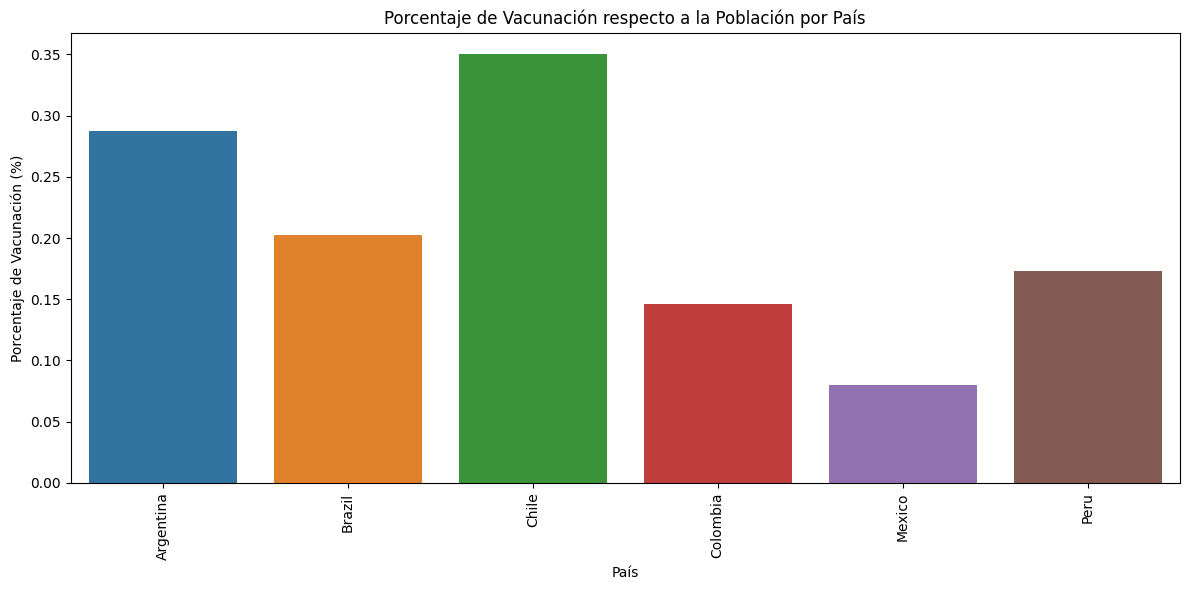

In [58]:
data_latam['porcentaje_vacunacion'] = (data_latam['cumulative_vaccine_doses_administered'] / data_latam['population']) * 1000
vacunacion_pais = data_latam.groupby('country_name')['porcentaje_vacunacion'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=vacunacion_pais,
    x='country_name',
    y='porcentaje_vacunacion',
    linewidth=0.5,  
    hue='country_name'
)

plt.title('Porcentaje de Vacunación respecto a la Población por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Vacunación (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Cantidad de muertes por país

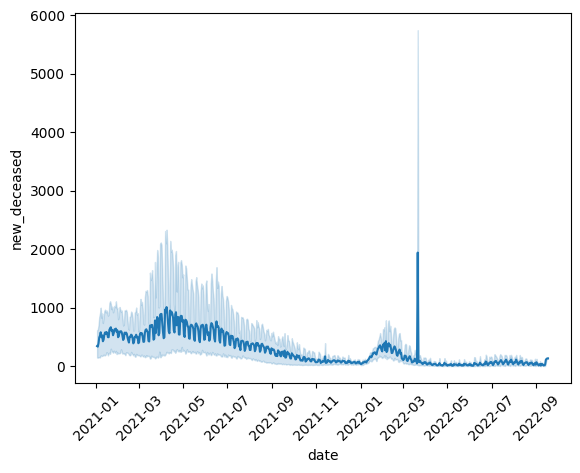

In [59]:

muertes_diarias = data_latam.groupby('country_name')['new_deceased'].resample('D').sum().reset_index()

plt.figure()
sns.lineplot(
    data= muertes_diarias,
    x='date',
    y='new_deceased'
)
plt.xticks(rotation=45)
plt.show()

Variación mensual de casos y muertes

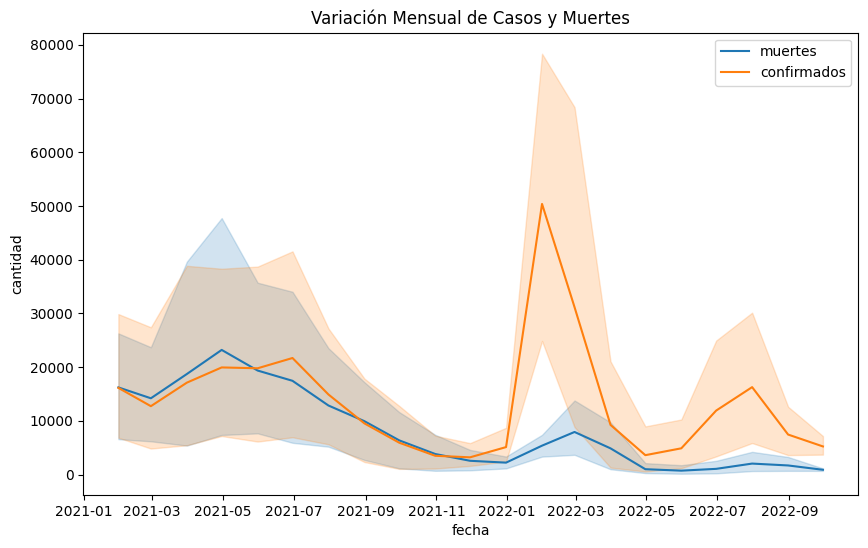

In [ ]:

muertes_mensuales = data_latam.groupby('country_name').resample('M')['new_deceased'].sum()
dif_muertes_mensuales = muertes_mensuales.reset_index()
dif_casos_mensuales = confirmados_mensuales.reset_index()
# dif_muertes_mensuales = muertes_mensuales.diff()
# dif_casos_mensuales = confirmados_mensuales.diff()

plt.figure(figsize=(10,6))
sns.lineplot(
       data = dif_muertes_mensuales,
             x='date',
             y='new_deceased',
             label='muertes'
             )
#ax1.set_title('Variación mensual de casos')
# ax1.set_xlabel('Mes')
# ax1.set_ylabel('Casos')
sns.lineplot(
             data = dif_casos_mensuales,
               x='date',
             y='new_confirmed',
             label='confirmados'
             )
# ax2.set_title('Variación mensual de muertes')
# ax2.set_xlabel('Mes')
# ax2.set_ylabel('Muertes')
plt.title('Variación Mensual de Casos y Muertes')
plt.xlabel('fecha')
plt.ylabel('cantidad')
plt.show()


Situación actual de casos, muertes,recuperados y vacunación

In [ ]:
data_latam2 = data_latam.copy()


data_latam2.reset_index()

data_latam2 = data_latam2.sort_values(by=['country_name', 'date'])



# Seleccionar la última fila (más actual) para cada país
situacion_actual = data_latam2.groupby('country_name').tail(1)[['new_confirmed', 'new_deceased', 'new_recovered', 'cumulative_vaccine_doses_administered']]

# Mostrar el resultado
print(situacion_actual)



   


# # plt.figure(figsize=(10,6))

# # sns
# situacion_actual
# # for i in data_latam.columns:#iteramos cada columna que no esté en la lista
#     if i in [situacion_actual]:
#         fig,ax = plt.subplots(figsize=(5,3))#creamos un barplot para cada uno con nombre y cantidades
#         sns.barplot(data=data_latam, x='country_name',y= i,ax=ax,hue='country_name')#con hue diferenciamos cada país con un color distinto
#         plt.title(f'{i} por país')
#         plt.show()

            new_confirmed  new_deceased  new_recovered  \
date                                                     
2022-09-17   12911.385484    134.379032   12911.385484   
2022-09-17   12911.385484    134.379032   12911.385484   
2022-09-17   12911.385484    134.379032   12911.385484   
2022-09-17   12911.385484    134.379032   12911.385484   
2022-09-17   12911.385484    134.379032   12911.385484   
2022-09-17   12911.385484    134.379032   12911.385484   

            cumulative_vaccine_doses_administered  
date                                               
2022-09-17                           12911.385484  
2022-09-17                           12911.385484  
2022-09-17                           12911.385484  
2022-09-17                           12911.385484  
2022-09-17                           12911.385484  
2022-09-17                           12911.385484  


TypeError: 'Axes' object is not subscriptable

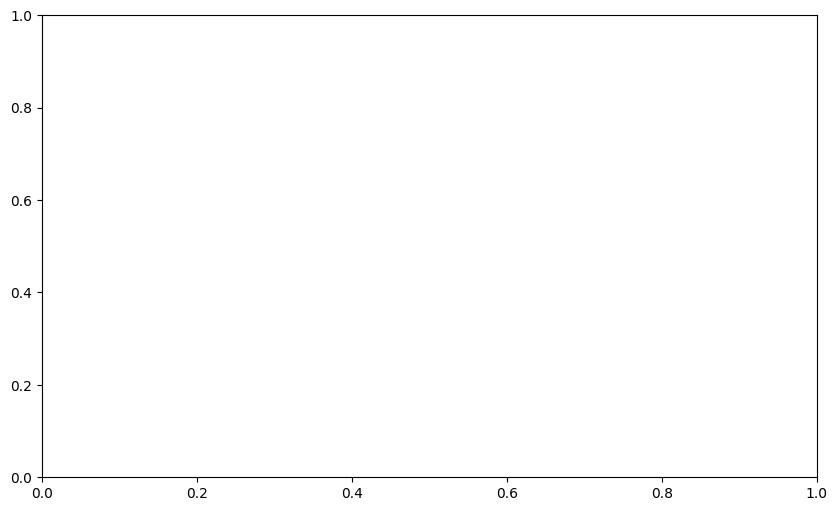

In [73]:
situacion_actual = data_latam2.groupby('country_name')[['country_name','new_confirmed', 'new_deceased', 'new_recovered', 'cumulative_vaccine_doses_administered']].tail(1)


fig,ax= plt.subplots(figsize=(10,6))


ax[0,0].bar(data=situacion_actual, x='date', height='new_confirmed',hue='country_name', label='Casos Confirmados')
ax[0,1].bar(data=situacion_actual, x='date', height='new_deceased', hue='country_name',label='Muertes')
ax[1,0].bar(data=situacion_actual, x='date', height='new_recovered',hue='country_name', label='Recuperados')
ax[1,1].bar(data=situacion_actual, x='date', height='cumulative_vaccine_doses_administered', hue='country_name', label='Vacunados')

plt.title('Situación Actual por País')

plt.xticks(rotation=90)
plt.legend()

plt.show()

CREAR MAPAS CON GEOPANDAS